In [1]:
import scipy as sc
from scipy import signal
import os   #used for directory work
import matplotlib.pyplot as plt #used for creating plots
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches #used for plot legends
%matplotlib inline

In [2]:
burn_d = {'01': [21000 ,22289], '02': [14000, 14972], '03': [20000, 20296], '04': [30000, 34979], '05': [15000, 15974], \
          '06': [6000, 6544], '07': [25000, 27822], '08': [18000, 19810], '09': [20000, 25047], '11': [30000,30681],  \
          '12': [60000, 62937], '13': [50000, 55131], '18': [185000, 192322], '19': [45000, 48831], '20': [24000, 25860],\
          '21': [25000, 27822], '22': [27000, 29484], '23': [45000, 48846], '24': [20000, 23015], '25': [25000, 26797], \
          '26': [25000, 26909], '27': [35000, 36916], '28': [27000, 28673], '29': [25000, 28166], '30': [12000, 13954], \
          '31': [30000, 31046], '32': [25000, 26294], '33': [20000, 23293], '34': [40000,43702]}

In [3]:

def text_finder(path):
    txt_files=[]
    all_files = os.listdir(path) #tells what directory the files are in
    for i in all_files: #reading only the .txt files 
        if i[-4:] == ".txt":
            txt_files.append(i)
    txt_files.sort() #alphabetizes them
    
    return txt_files

def file_to_df(path):
    df= pd.read_csv(path,na_values = ['NAN', "00nan", "NaN"], sep=" ")
    #df.fillna(value=np.nan, inplace=True)
    
    return df

def day_color(df, full_timestamp = True):
    dates = ["2018-03-05", "2018-03-06", "2018-03-17", "2018-05-09", "2018-05-10", \
            "2018-05-11", "2018-09-22", "2019-05-20", "2019-05-21", "2019-05-22", \
            "2019-05-29", "2019-05-31"]
    colors = ["navy", "maroon", "darkolivegreen", "darkorange", "plum", "turquoise", \
              "saddlebrown", "y", "goldenrod", "mediumseagreen", "indigo", "magenta"  ]
    
    
    if full_timestamp == True:
        for t in range(len(dates)):
            if df["TIMESTAMP"][0][:10] ==dates[t]:
                return colors[t]
                break
                l
    if full_timestamp == False:
        for t in range(len(dates)):
            if str(pd.Timestamp(df["YYYY"][0],df["MM"][0],df["DD"][0]))[:10] == dates[t]:
                return colors[t]
                break
                
def fire_start(df,n):    
    ### Finding the start of fire
    x_fire, fire_5sig = 9e10, np.nanmean(df["T"][:n])+5*np.std(df["T"][:n]) 
    start = n-9000
    if n-9000< 0:
        start = 0
    #print(5*np.std(df["T"][start:n]))
    for i in range(n, len(df["T"])):
        if df["T"][i] > fire_5sig:
            x_fire = i
            break
    
    return x_fire


In [4]:
#######################################################
def speed_calculation(df):
    horizontal_speed = np.sqrt(df["V"]**2 + df["U"]**2)
    return horizontal_speed

#######################################################
def fire_period_split(var_lst, x_fire, period_t = 9000):
    
    t_start, f_end, t_end  =x_fire-period_t, x_fire+period_t, (len(var_lst)-1)
    if t_start < 0:
        t_start = 0
    
    #if t_ - x_fire > 0:
    #    t_start = s_fire - index_time
    #if s_fire + index_time > t_end:
    #    t_end = s_fire + index_time
    
    
    pre_lst = list(var_lst[int(t_start) : int(x_fire)])
    brn_lst = list(var_lst[int(x_fire) : int(x_fire+period_t)])
    pst_lst = list(var_lst[int(x_fire+period_t) : int(x_fire+(period_t*2))])
    var_mean = np.nanmean(pre_lst)
        
    pre_lst -= var_mean
    brn_lst -= var_mean
    pst_lst -= var_mean
    
    return pre_lst, brn_lst, pst_lst

#######################################################
def welch_spectra(var_lst, freq = 10):
    
    nan_count = 0 
    
    df = pd.DataFrame()
    
    df["var"] = var_lst
    nan_count = int(len(df) - df.count())
    #print(nan_count)
    df = df.interpolate(method='linear', axis=0)
    df.fillna(value=0, inplace=True)
    
    #var_lst = list(df["var"])
    #for i in range(len(var_lst)):
    #    if str(var_lst[i]).lower() =="nan": 

     #       var_lst[i] = 0 
     #       nan_count+= 1
    #count_nan = len(df) - df.count()
    welch_lst, x_lst = signal.welch(list(df["var"]), freq)#, nperseg = 28) #,nperseg=8000, average='median')
    norm = np.linalg.norm(welch_lst)
    normal_array = welch_lst/norm
    
    return  normal_array, x_lst, nan_count

#def calculations():

In [5]:
first_sonic_d = {"04":["C1","C2"], "05": ["B1", "B2", "B3", "B4", "C1", "C2", "C3", "C4"],\
              "06": ["B1", "B2", "B3", "B4", "C1", "C2", "C3", "C4"], \
               "11":["B1", "B2", "B4", "C1", "C2", "C3", "C4"], \
               "20": ["B2", "B3", "B4", "C1", "C2", "C3", "C4"], \
              "21": ["B2", "B3", "C2", "C4"], "22" : ["B2", "C1", "C2", "C4"], \
              "22" : ["B2", "C1", "C2", "C4"], "23" : ["B2", "B3", "C1", "C2"], \
              "24" : ["B2", "C1", "C2", "C4"], "25" : ["B2", "B3", "C1", "C2", "C4"], \
              "26" : ["B2", "C1", "C2", "C4"], "29" : ["B2", "C1", "C2", "C4"], \
              "30" : ["B2", "C1", "C2", "C4" ], "34" : ["C1"]}

second_sonic_d = {"03" : ["B1", "B2", "B3", "C1", "C2", "C3", "C4"],"09": ["C1", "C2", "C4"], \
                 "28": ["B2"], "33": ["B2", "C3", "C4"]}

third_sonic_d = {"01":["B3", "C3"], "02" : ["B1", "B2", "B3", "B4", "C1", "C2", "C3","C4"], \
                "13": ["B1", "B2", "B4", "C1", "C2", "C4"], \
                 "27" : ["B2", "C1", "C2", "C4"] }

In [6]:
x = 0 
for i in third_sonic_d:
    print(i,third_sonic_d[i])
    x+= len(third_sonic_d[i])
print(x)

01 ['B3', 'C3']
02 ['B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']
13 ['B1', 'B2', 'B4', 'C1', 'C2', 'C4']
27 ['B2', 'C1', 'C2', 'C4']
20


In [7]:
def welch_power_spec(variable, sigma_fire = True ):

    burn_d = {'01': [21000 ,22289], '02': [14000, 14972], '03': [20000, 20296], '04': [30000, 34979], '05': [15000, 15974], \
              '06': [6000, 6544], '07': [25000, 27822], '08': [18000, 19810], '09': [20000, 25047], '11': [30000,30681],  \
              '12': [60000, 62937], '13': [50000, 55131], '18': [185000, 192322], '19': [45000, 48831], '20': [24000, 25860],\
              '21': [25000, 27822], '22': [27000, 29484], '23': [45000, 48846], '24': [20000, 23015], '25': [25000, 26797], \
              '26': [25000, 26909], '27': [35000, 36916], '28': [27000, 28673], '29': [25000, 28166], '30': [12000, 13954], \
              '31': [30000, 31046], '32': [25000, 26294], '33': [20000, 23293], '34': [40000,43702]}
    
    #burn = "01"
    path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #w10
    path_end = "/sonics/"
    #B2_UVWT_Burn-01.txt

        #files = text_finder(p)


    blu_patch = mpatches.Patch(color = "b", label = "PRE", linewidth = .1)
    red_patch = mpatches.Patch(color = "r", label = "BRN", linewidth = .1)
    grn_patch = mpatches.Patch(color = "g", label = "PST", linewidth = .1)
    patches = [blu_patch, red_patch, grn_patch]

    fig, axs = plt.subplots(nrows=11,ncols=6,figsize=(22,26), sharey = True, sharex = True)

    col, row = 0, 0
    for i in first_sonic_d:
        burn = i
        for sc in first_sonic_d[i]:
            p = path+i+ path_end+sc+"_UVWT_Burn-"+i+".txt"
            df=file_to_df(p)
            temp_5sig = " "
            ax = axs[ row, col]
            if sigma_fire == True:
                if variable !="S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(list(df[variable]), burn_d[burn][1])
                if variable == "S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(speed_calculation(df), burn_d[burn][1])
            if sigma_fire == False:
                
                x_fire = fire_start(df, burn_d[burn][0])
                if x_fire == 9e10:
                    x_fire = burn_d[burn][1]
                    temp_5sig = "*"
                if variable !="S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(list(df[variable]), x_fire)
                if variable == "S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(speed_calculation(df), x_fire)
            
            pre_x, pre_y, pre_nan = welch_spectra(pre_lst)
            brn_x, brn_y, brn_nan = welch_spectra(brn_lst)
            pst_x, pst_y, pst_nan = welch_spectra(pst_lst)

            ax.loglog(pre_x, pre_y, color = "b", linewidth=1)
            ax.loglog(brn_x, brn_y, color = "r", linewidth=1)
            ax.loglog(pst_x, pst_y, color = "g", linewidth=1)
            
            ax.set_xlim(10**(-3),2*10**-1)
            if variable == "T":
                ax.set_ylim(10**(-5),10**3)
            if variable == "W":
                ax.set_ylim(10**(-4),5*10**(0))
            if variable == "S":
                ax.set_ylim(10**(-4),10**(1))
                
            ax.set_title("B"+burn+" "+sc+temp_5sig, fontsize = 14)
            
            
            fmt = "{:4}:{:3}/{} "
            if pre_nan > 0 or len(pre_lst) < 9000:
                ax.text(1.1*10**-3,5*10**-4, fmt.format("PRE", pre_nan, len(pre_lst)))
           
            if brn_nan > 0 or len(brn_lst) < 9000:
                ax.text(1.1*10**-3,2*10**-4, fmt.format("BRN", brn_nan, len(brn_lst)))
            
            if pst_nan > 0 or len(pst_lst) < 9000:
                ax.text(1.1*10**-3,.8*10**-4, fmt.format("PST", pst_nan, len(pst_lst)))
            
            
            ax.grid()
            #ax.legend(markerscale = 5, loc = "upper right")
            
            if col == 0:
                ax.set_ylabel("Power", fontsize = 14)
            if row == 10:
                ax.set_xlabel("Frequency", fontsize = 14)
            
            if col <= 6:
                col += 1
            if col  == 6:
                col = 0
                row +=1
            #print(row, col)
    fig.tight_layout()
    leg = fig.legend(handles = patches, ncol = 3, bbox_to_anchor = (.8, .94), fontsize = 16)
    fig.subplots_adjust(hspace=0.2, wspace=0.1, top=.9)#, left = 0.05, right = .95, bottom = .07)
    if variable == "S":
        title = "Horizontal Winds ("+variable+"')"
    if variable == "T":
        title = "Temperature ("+variable+"')"
    if variable == "W":
        title = "Verticle Winds ("+variable+"')"
         
    fig.suptitle("Normalized Power Spectral Density of " + title+" (1st Group)", fontsize = 24, x= .3, y= .94, fontweight = "heavy")                 
    if sigma_fire == True:
        fig.text(.825,.92, r"5$\sigma$: First Sonic", fontsize =20)
        fig.savefig("First-Group-PDS-"+variable+"_first_sonic.png",dpi=350)
    if sigma_fire == False:
        fig.text(.825,.92, r"5$\sigma$: Per Sonic", fontsize =20)
        fig.savefig("First-Group-PDS-"+variable+"_per_sonic.png",dpi=350)
    plt.show()
    
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 234, using nperseg = 234
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 78, using nperseg = 78
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 65, using nperseg = 65
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  .format(nperseg, input_length))


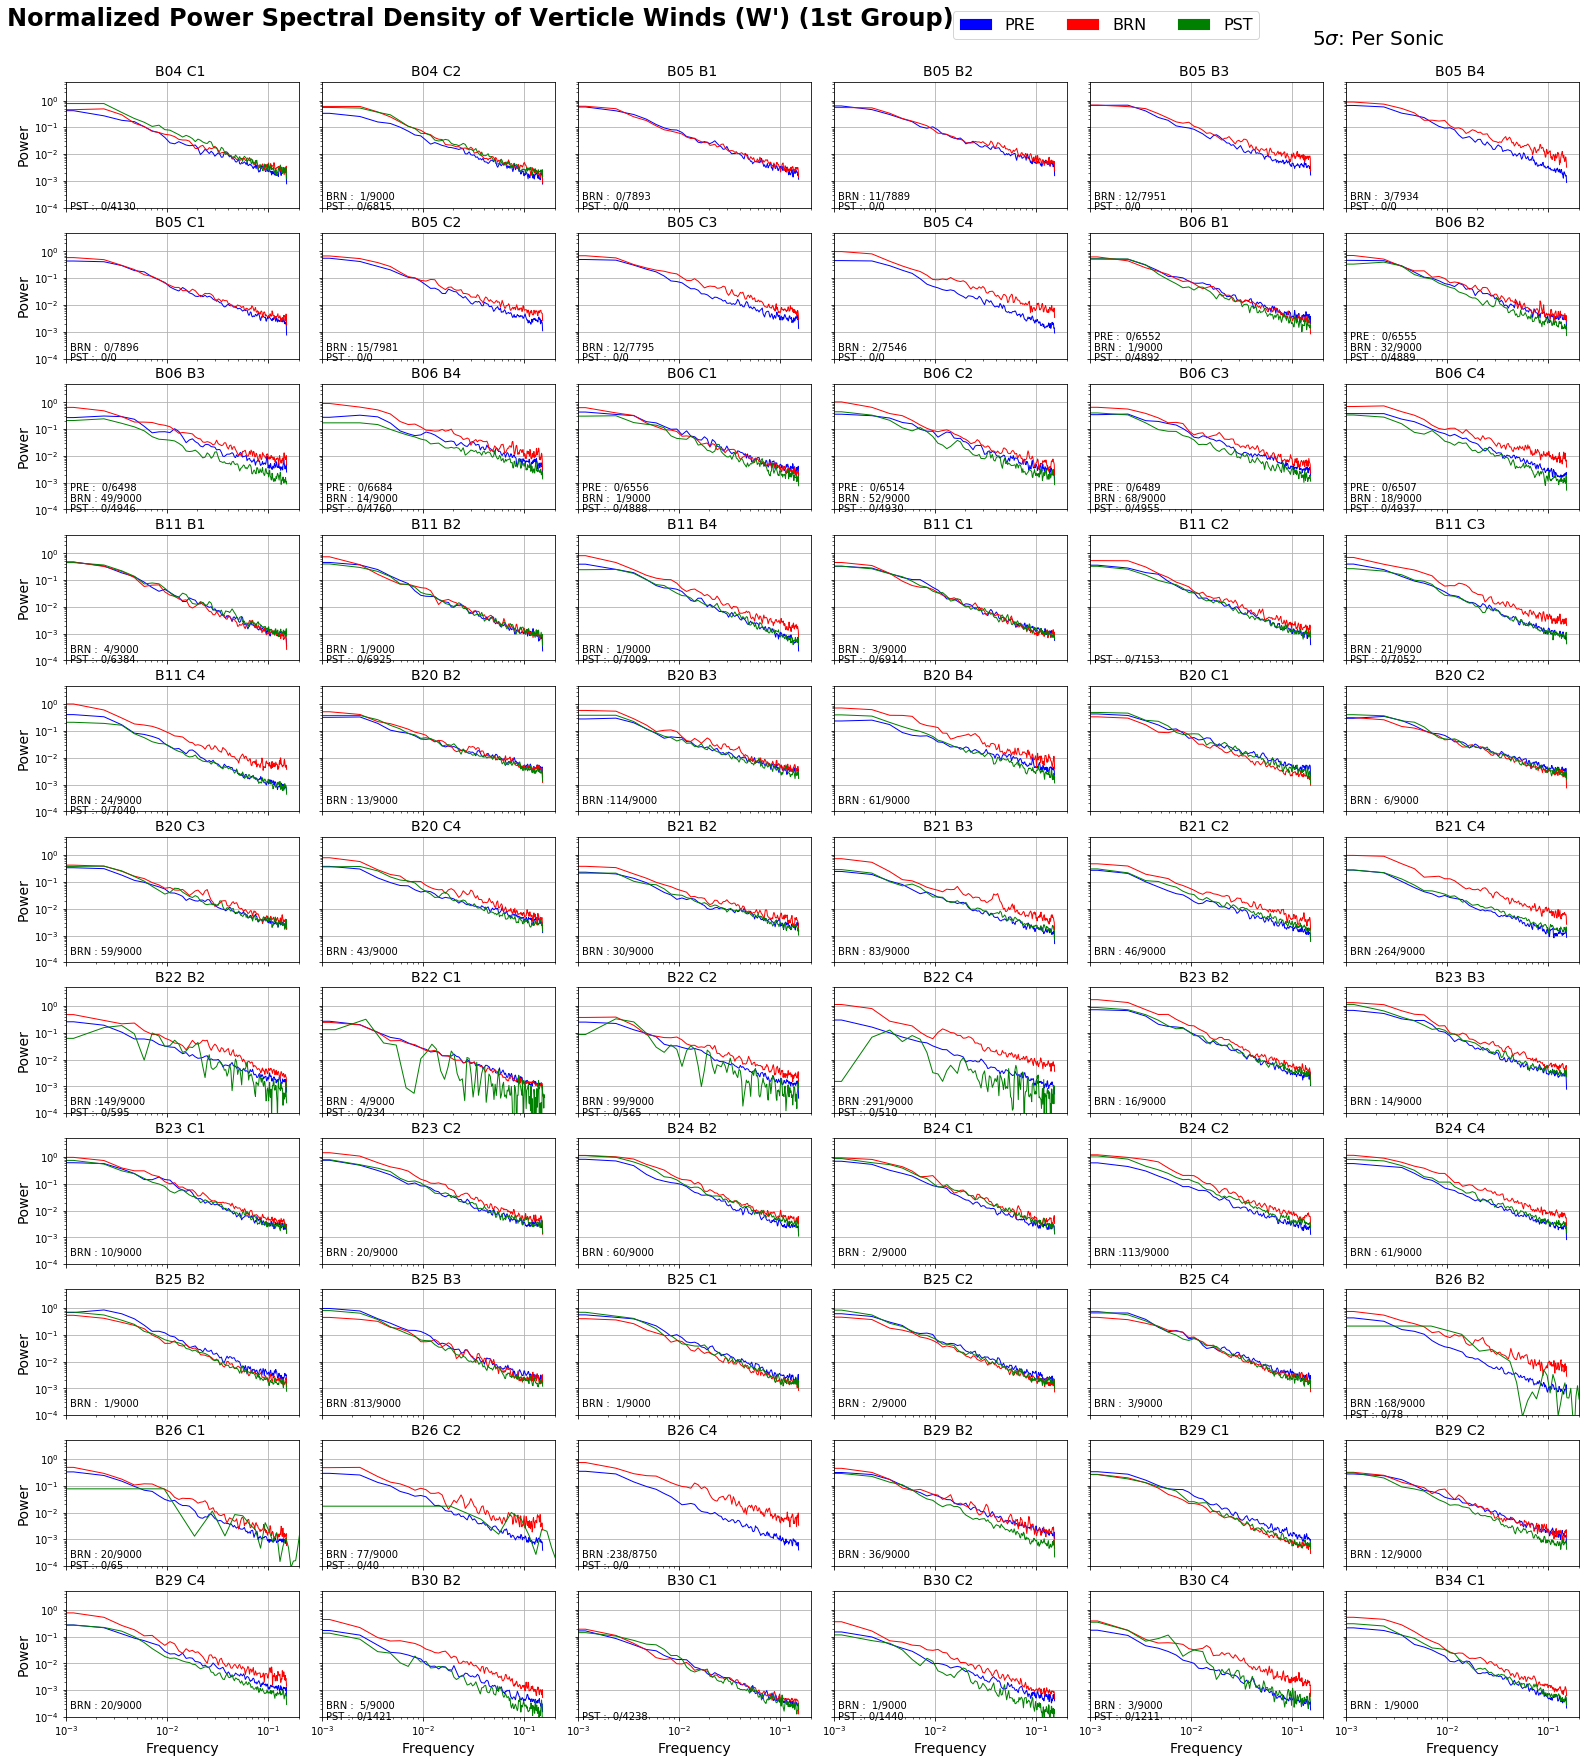

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))


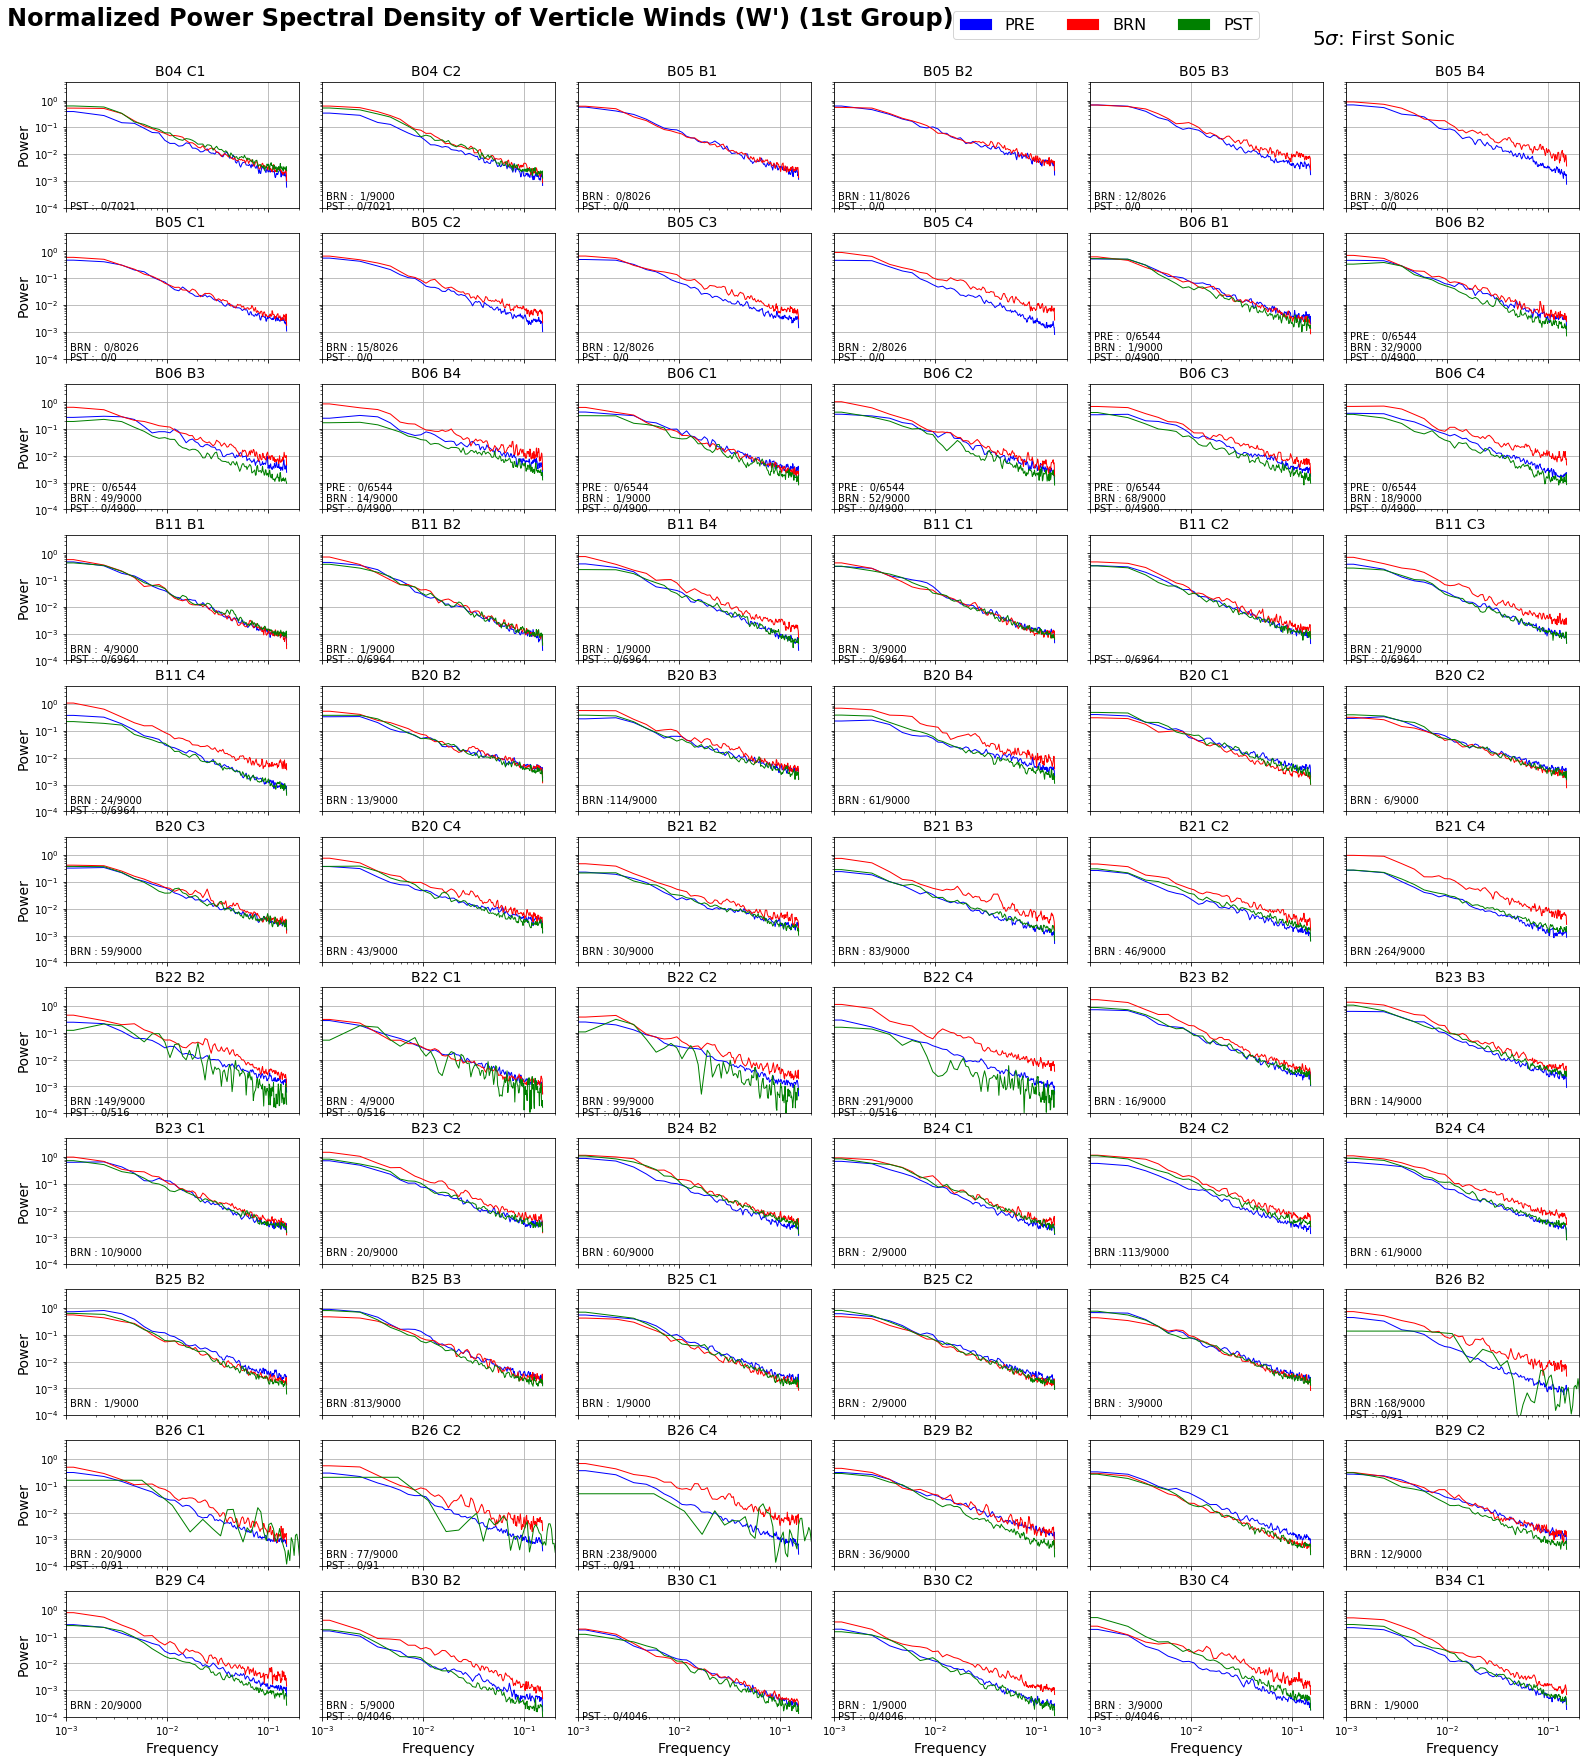

In [8]:
welch_power_spec("W",False)
welch_power_spec("W",True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 234, using nperseg = 234
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 78, using nperseg = 78
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 65, using nperseg = 65
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  .format(nperseg, input_length))


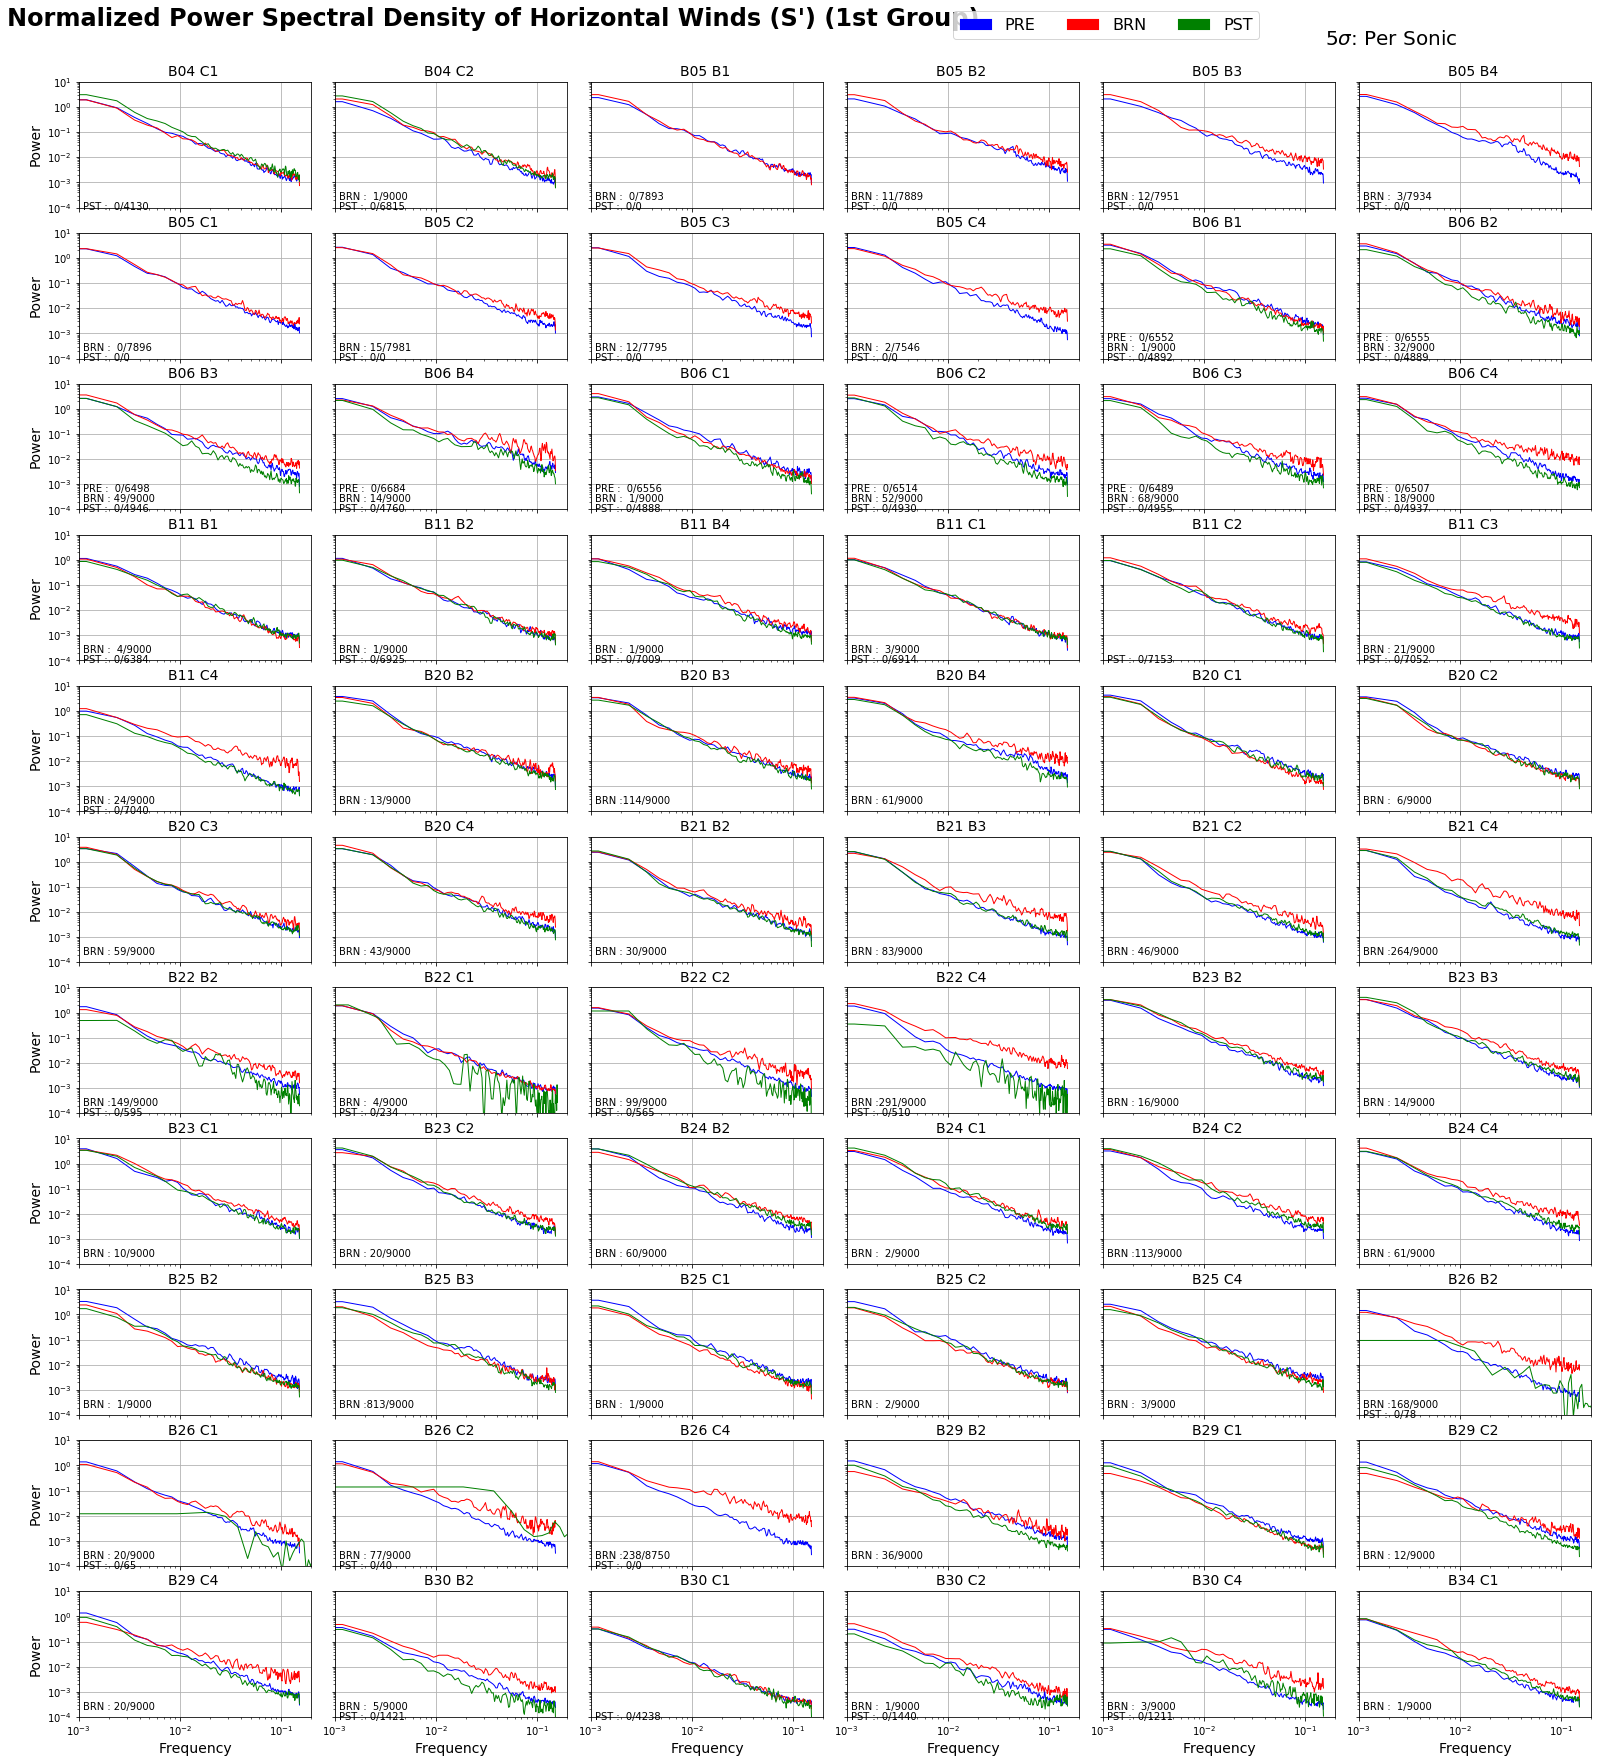

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))


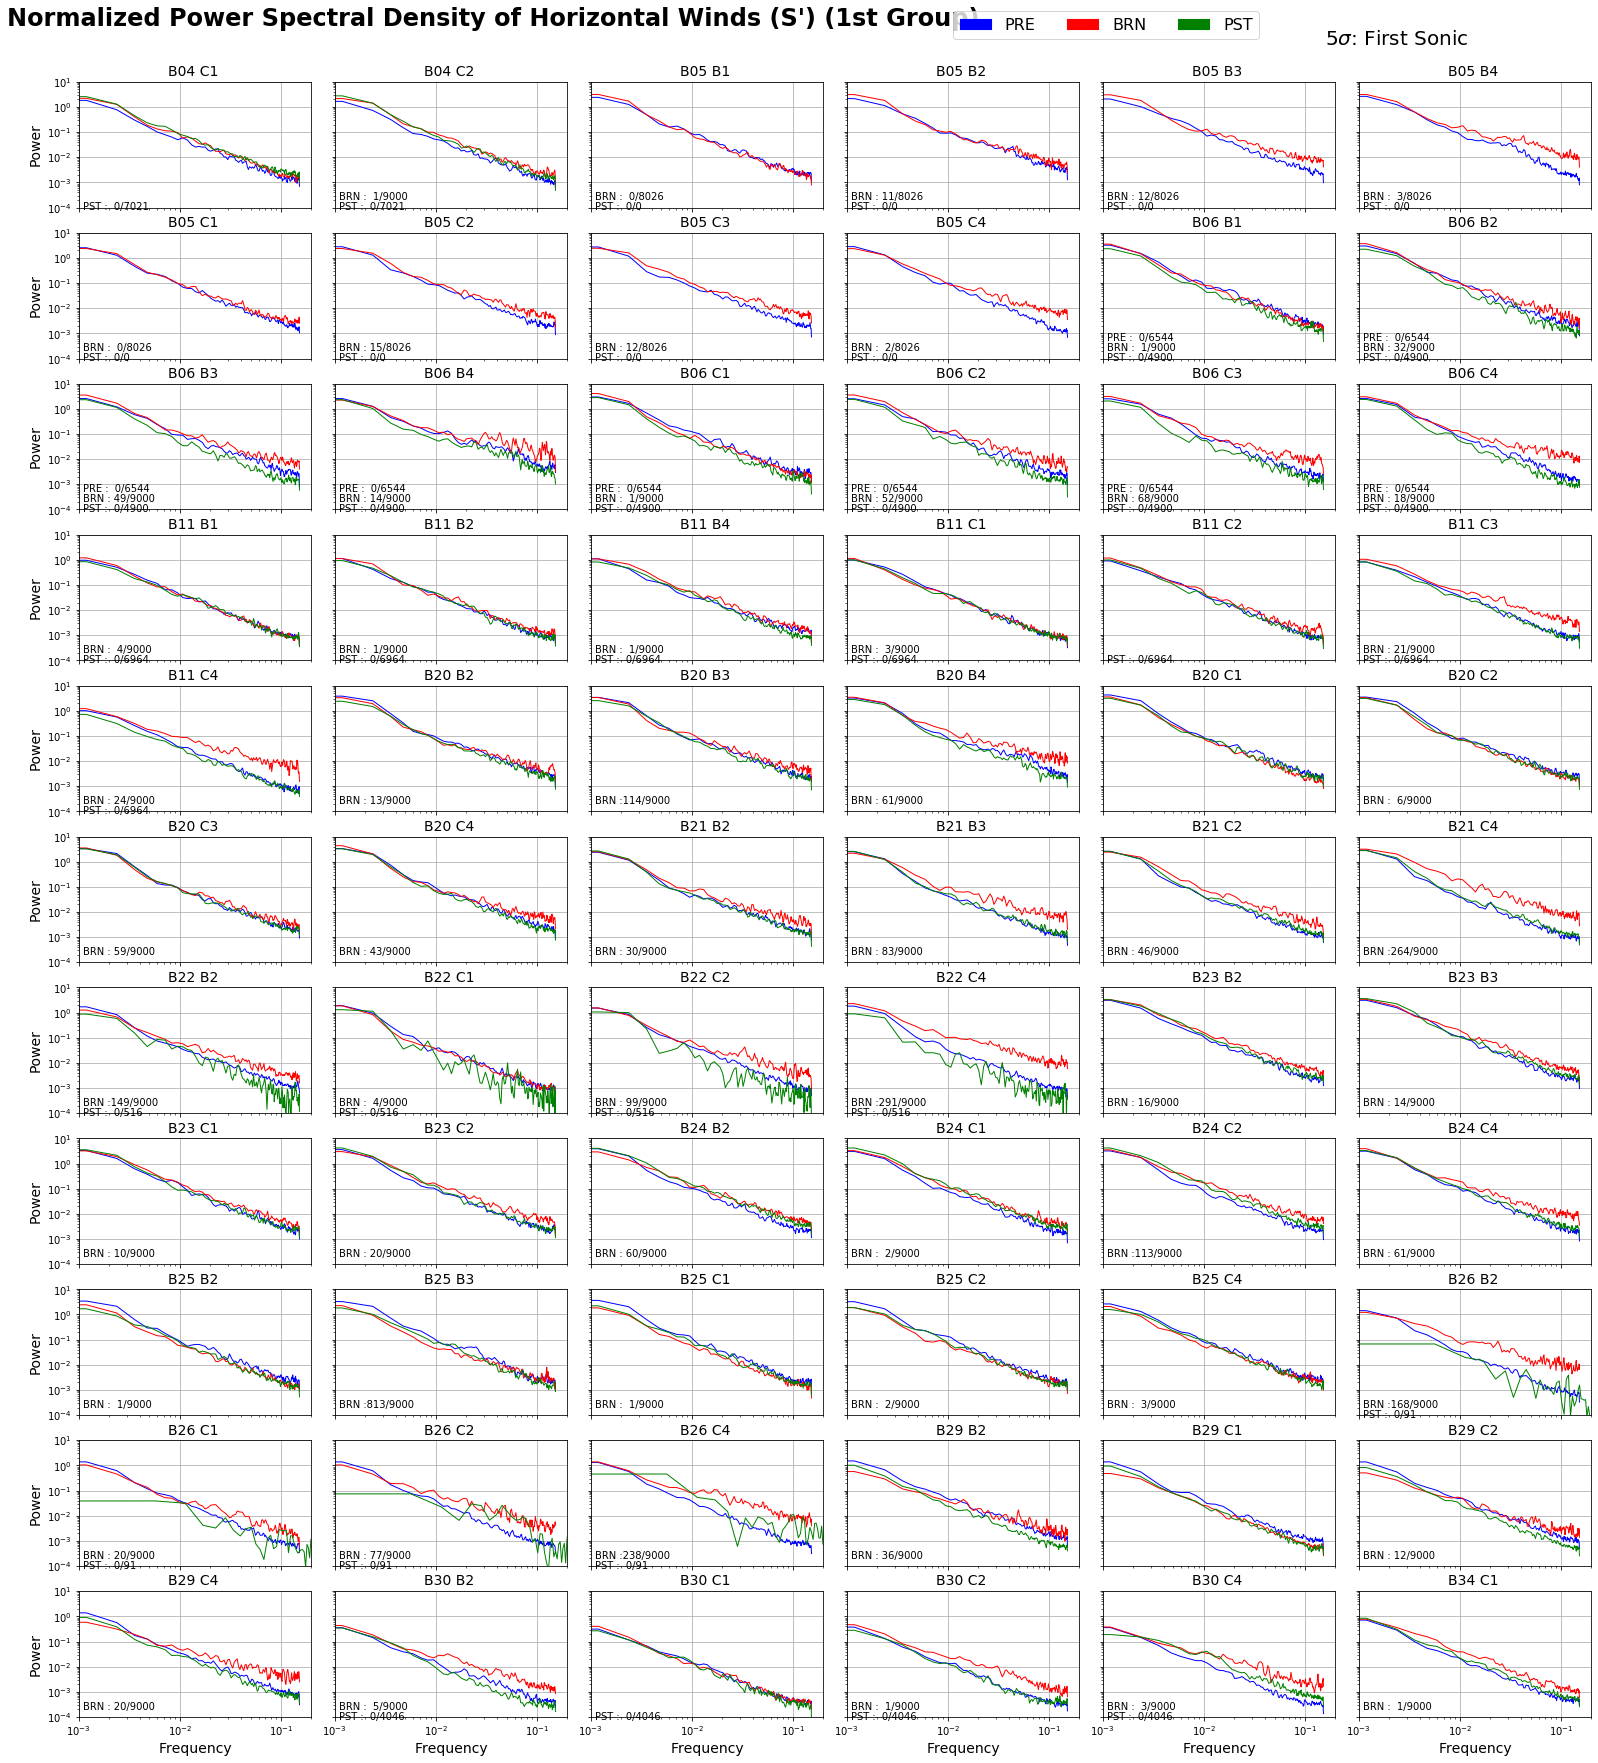

In [9]:
welch_power_spec("S",False)
welch_power_spec("S",True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 234, using nperseg = 234
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 78, using nperseg = 78
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 65, using nperseg = 65
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  .format(nperseg, input_length))


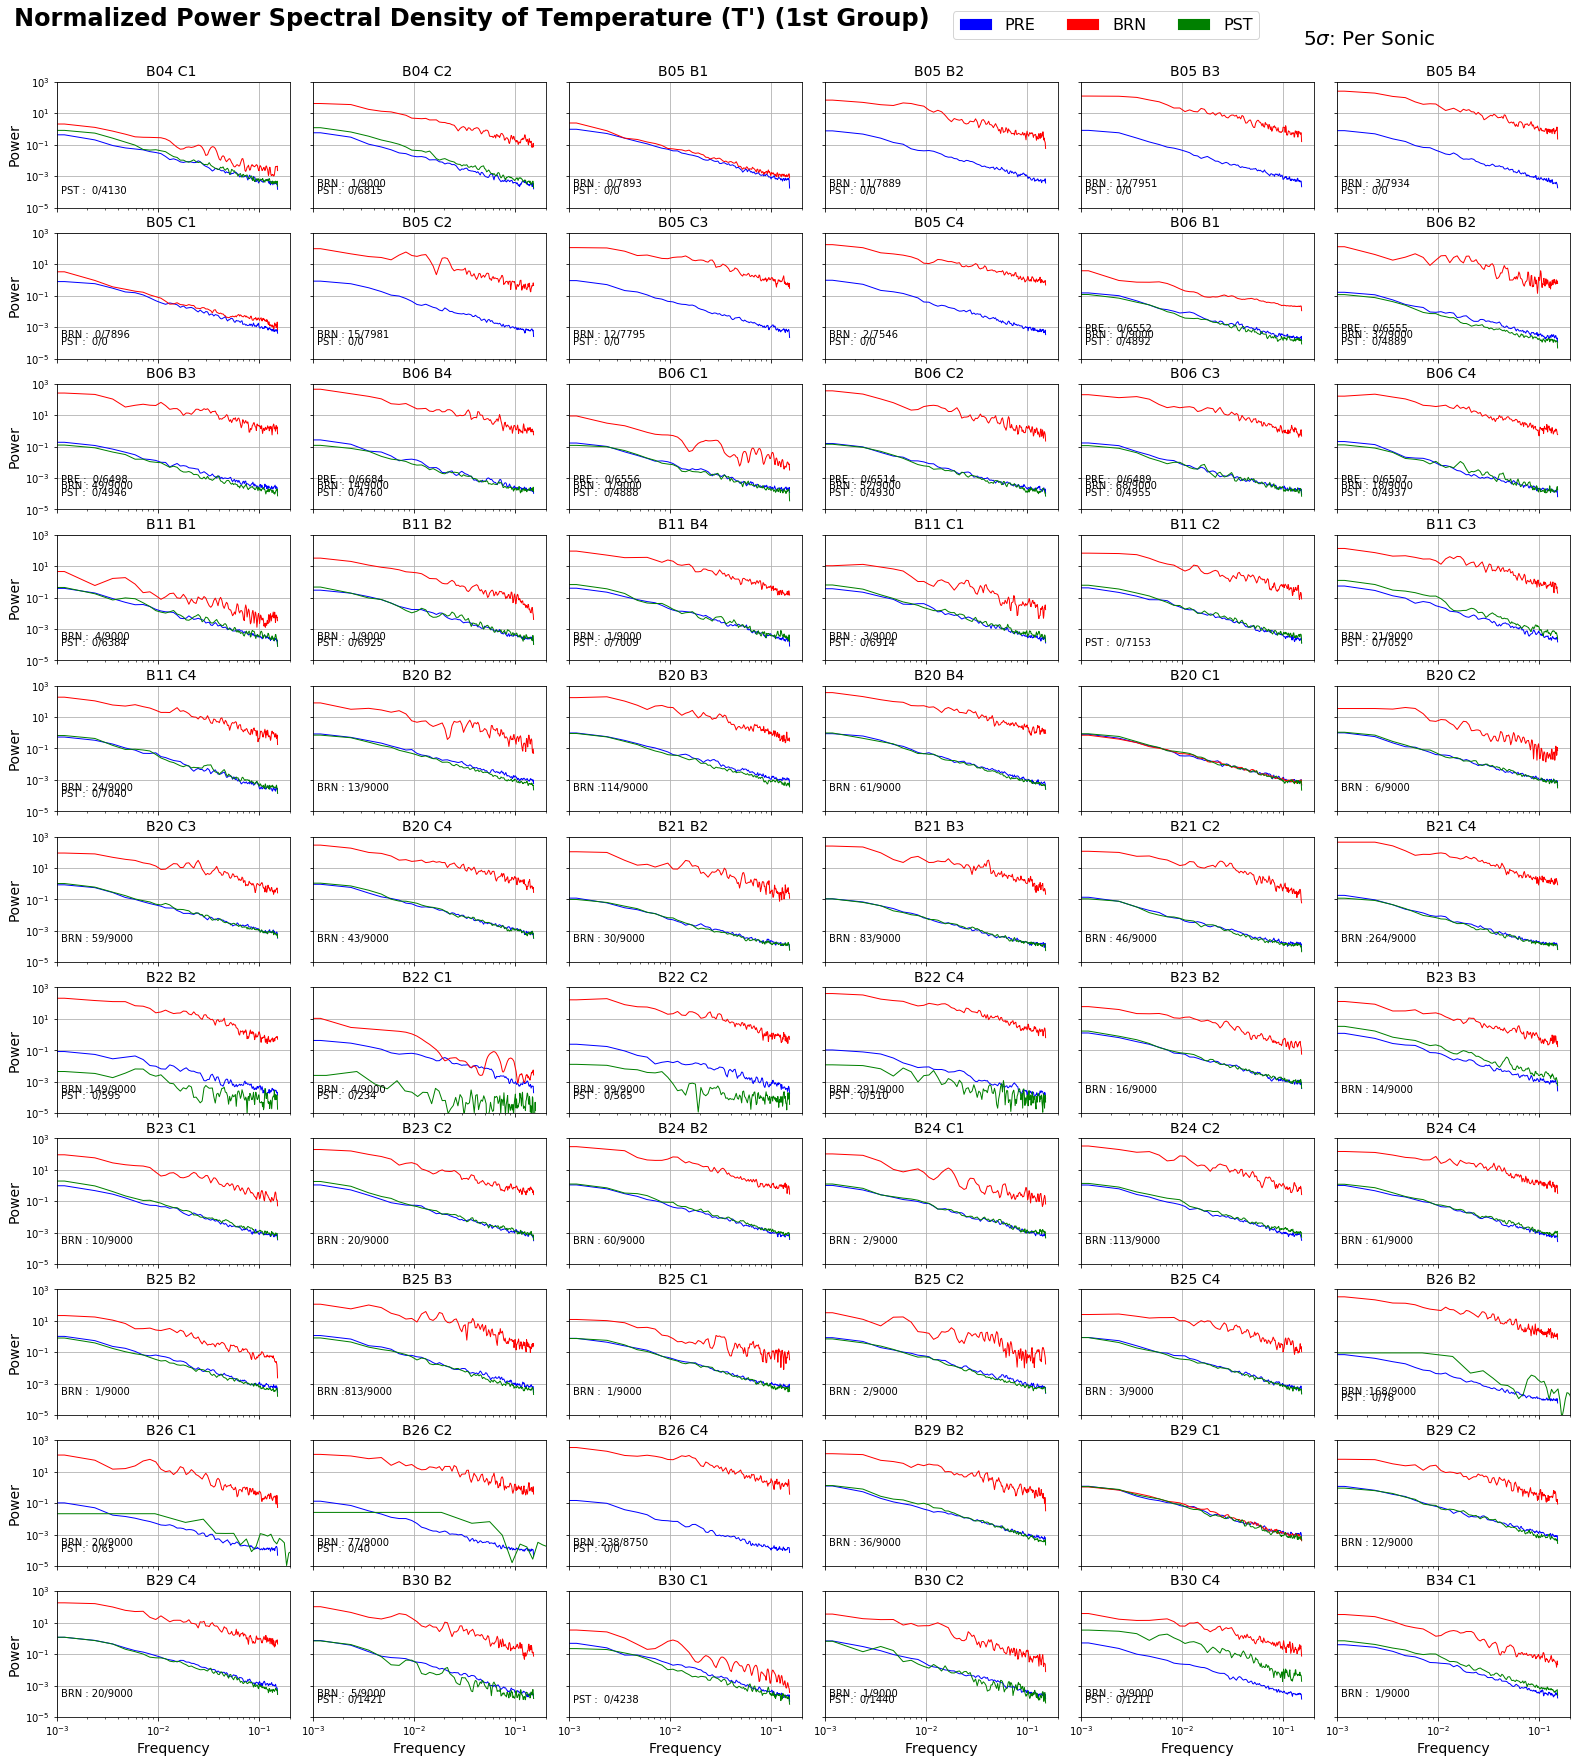

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 91, using nperseg = 91
  .format(nperseg, input_length))


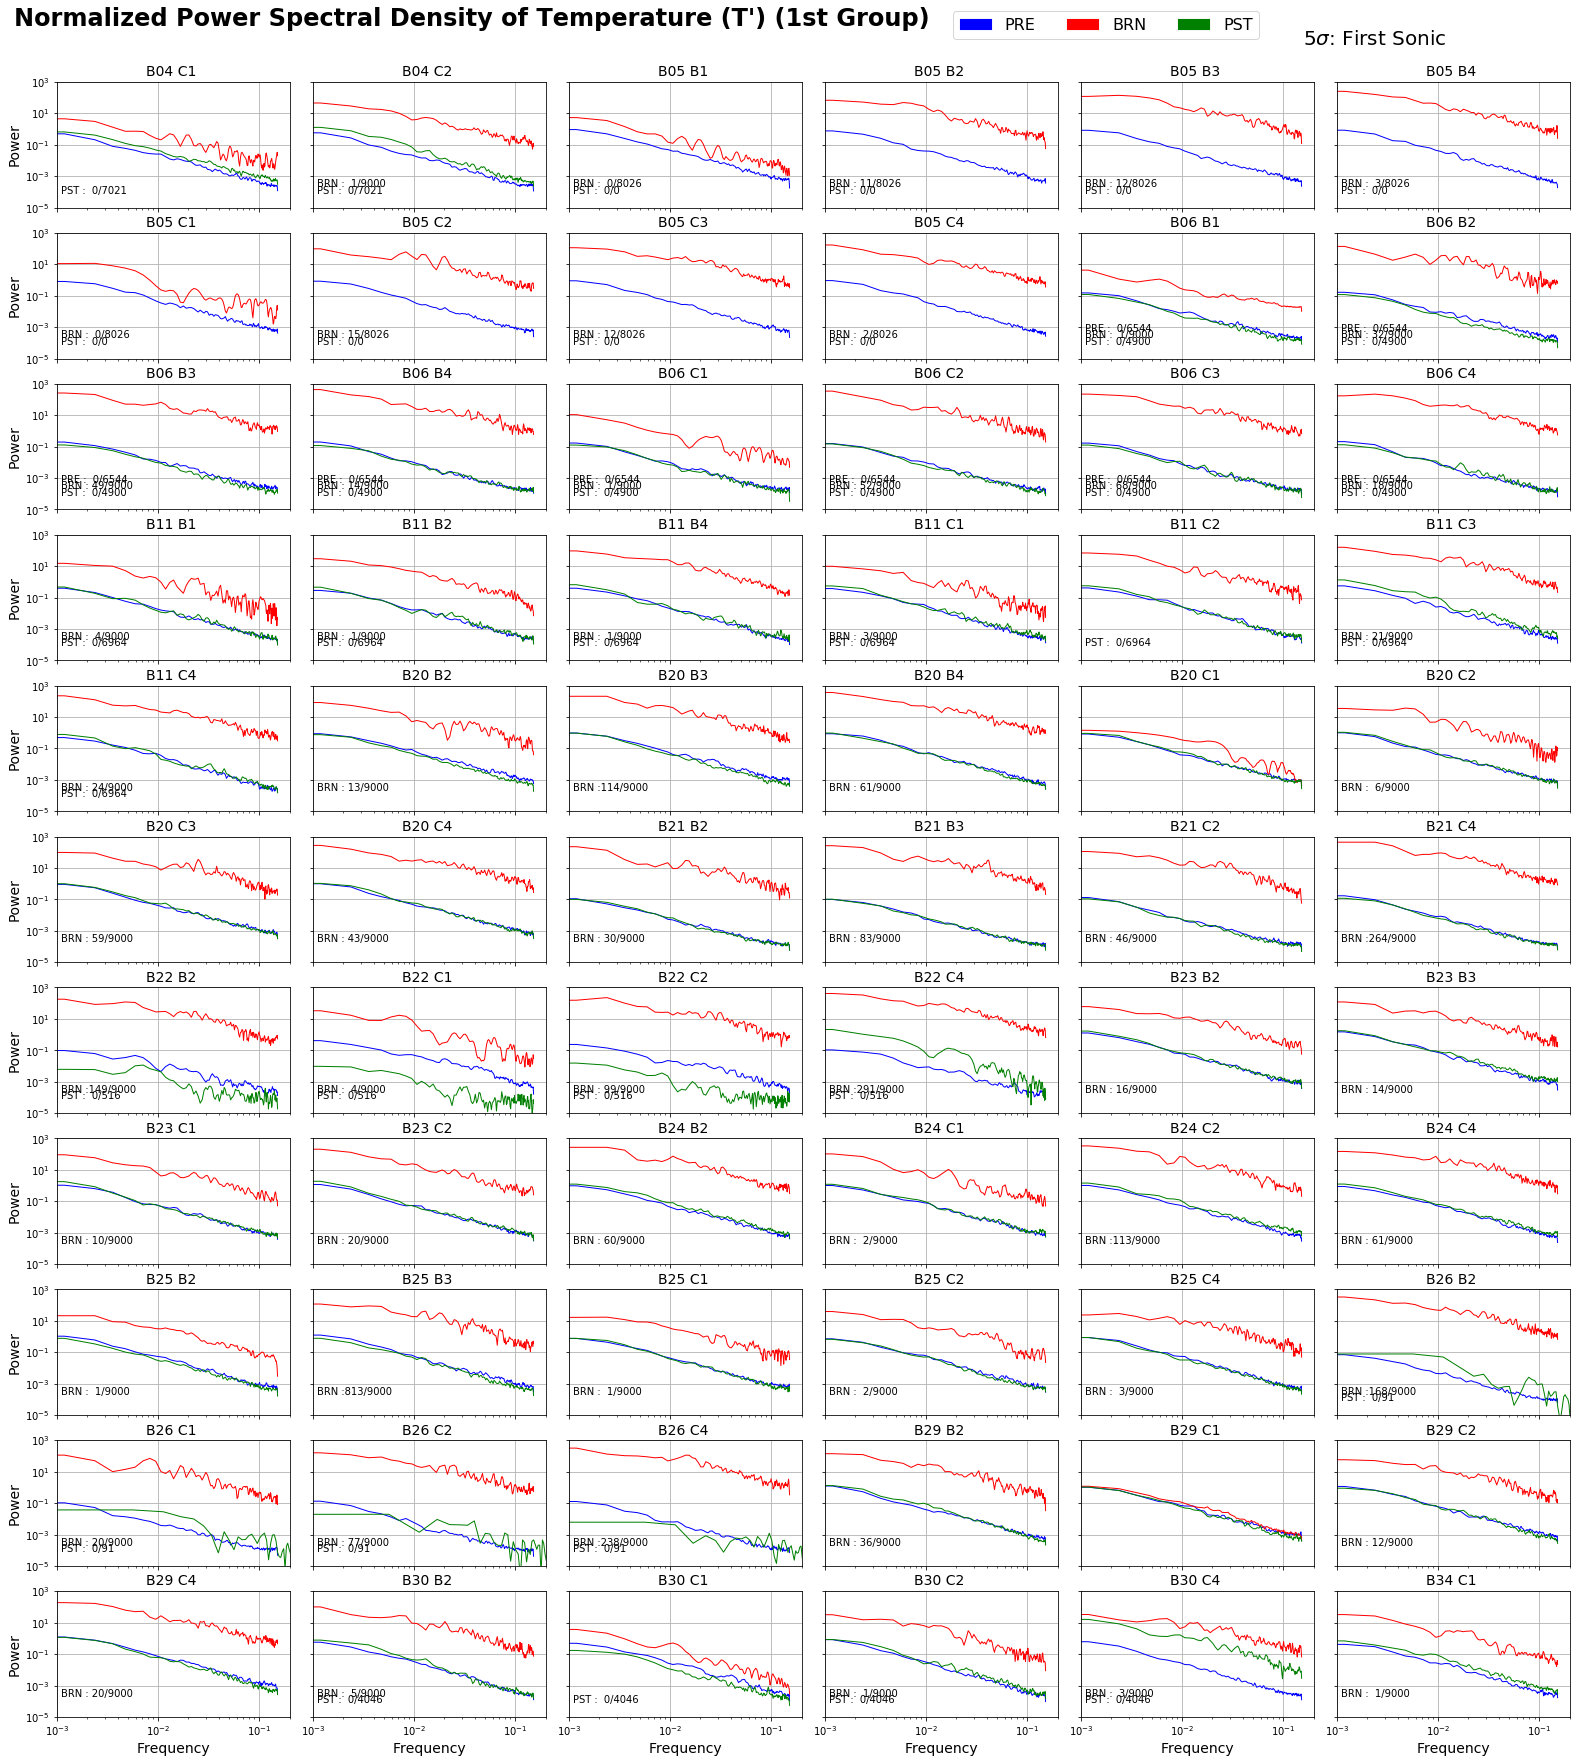

In [10]:
welch_power_spec("T",False)
welch_power_spec("T",True)

In [11]:
def welch_power_spec_2(variable, sigma_fire = True ):

    burn_d = {'01': [21000 ,22289], '02': [14000, 14972], '03': [20000, 20296], '04': [30000, 34979], '05': [15000, 15974], \
              '06': [6000, 6544], '07': [25000, 27822], '08': [18000, 19810], '09': [20000, 25047], '11': [30000,30681],  \
              '12': [60000, 62937], '13': [50000, 55131], '18': [185000, 192322], '19': [45000, 48831], '20': [24000, 25860],\
              '21': [25000, 27822], '22': [27000, 29484], '23': [45000, 48846], '24': [20000, 23015], '25': [25000, 26797], \
              '26': [25000, 26909], '27': [35000, 36916], '28': [27000, 28673], '29': [25000, 28166], '30': [12000, 13954], \
              '31': [30000, 31046], '32': [25000, 26294], '33': [20000, 23293], '34': [40000,43702]}
    
    #burn = "01"
    path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #w10
    path_end = "/sonics/"
    #B2_UVWT_Burn-01.txt

        #files = text_finder(p)


    blu_patch = mpatches.Patch(color = "b", label = "PRE", linewidth = .1)
    red_patch = mpatches.Patch(color = "r", label = "BRN", linewidth = .1)
    grn_patch = mpatches.Patch(color = "g", label = "PST", linewidth = .1)
    patches = [blu_patch, red_patch, grn_patch]

    fig, axs = plt.subplots(nrows=3,ncols=6,figsize=(22,8), sharey = True)#, sharex = True)

    col, row = 0, 0
    for i in second_sonic_d:
        burn = i
        for sc in second_sonic_d[i]:
            p = path+i+ path_end+sc+"_UVWT_Burn-"+i+".txt"
            df=file_to_df(p)
            temp_5sig = " "
            ax = axs[ row, col]
            if sigma_fire == True:
                if variable !="S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(list(df[variable]), burn_d[burn][1])
                if variable == "S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(speed_calculation(df), burn_d[burn][1])
            if sigma_fire == False:
                
                x_fire = fire_start(df, burn_d[burn][0])
                if x_fire == 9e10:
                    x_fire = burn_d[burn][1]
                    temp_5sig = "*"
                if variable !="S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(list(df[variable]), x_fire)
                if variable == "S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(speed_calculation(df), x_fire)
            
            pre_x, pre_y, pre_nan = welch_spectra(pre_lst)
            brn_x, brn_y, brn_nan = welch_spectra(brn_lst)
            pst_x, pst_y, pst_nan = welch_spectra(pst_lst)

            ax.loglog(pre_x, pre_y, color = "b", linewidth=1)
            ax.loglog(brn_x, brn_y, color = "r", linewidth=1)
            ax.loglog(pst_x, pst_y, color = "g", linewidth=1)
            
            ax.set_xlim(10**(-3),2*10**-1)
            if variable == "T":
                ax.set_ylim(10**(-5),10**3)
            if variable == "W":
                ax.set_ylim(10**(-4),5*10**(0))
            if variable == "S":
                ax.set_ylim(10**(-4),10**(1))
                
            ax.set_title("B"+burn+" "+sc+temp_5sig, fontsize = 14)
            
            
            fmt = "{:4}:{:3}/{} "
            if pre_nan > 0 or len(pre_lst) < 9000:
                ax.text(1.1*10**-3,5*10**-4, fmt.format("PRE", pre_nan, len(pre_lst)))
           
            if brn_nan > 0 or len(brn_lst) < 9000:
                ax.text(1.1*10**-3,2*10**-4, fmt.format("BRN", brn_nan, len(brn_lst)))
            
            if pst_nan > 0 or len(pst_lst) < 9000:
                ax.text(1.1*10**-3,.8*10**-4, fmt.format("PST", pst_nan, len(pst_lst)))
          
                
            
            #ax.legend(markerscale = 5, loc = "upper right")
            if row == 0:
                ax.tick_params(axis = "x", which = "both", bottom =False, top= False,labelbottom = False)

            if row == 1 and col <2:
                ax.tick_params(axis = "x", which = "both", bottom =False, top= False,labelbottom = False)
             
                
            #set_tick_params( bottom='on',labelbottom='on')# labelleft='off', \
                            #labeltop='off', labelright='off', labelbottom='off')
            ax.grid()
            if col == 0:
                ax.set_ylabel("Power", fontsize = 14)
            if row == 2:
                ax.set_xlabel("Frequency", fontsize = 14)
            if row == 1 and col >=2:
                ax.set_xlabel("Frequency", fontsize = 14)
            
            if col <= 6:
                col += 1
            if col  == 6:
                col = 0
                row +=1
            #print(row, col)
    for i in range(4):
        ax = axs[2, 2+i]
        ax.set_visible(False)
    fig.tight_layout()
    leg = fig.legend(handles = patches, ncol = 3, bbox_to_anchor = (.8, .99), fontsize = 16)
    fig.subplots_adjust(hspace=0.2, wspace=0.1, top=.9)#, left = 0.05, right = .95, bottom = .07)
    if variable == "S":
        title = "Horizontal Winds ("+variable+"')"
    if variable == "T":
        title = "Temperature ("+variable+"')"
    if variable == "W":
        title = "Verticle Winds ("+variable+"')"
         
    fig.suptitle("Normalized Power Spectral Density of " + title+" (2nd Group)", fontsize = 22, x= .3, y= .99, fontweight = "heavy")                 
    if sigma_fire == True:
        fig.text(.825,.96, r"5$\sigma$: First Sonic", fontsize =20)
        fig.savefig("Second-Group-PDS-"+variable+"_first_sonic.png",dpi=350)
    if sigma_fire == False:
        fig.text(.825,.96, r"5$\sigma$: Per Sonic", fontsize =20)
        fig.savefig("Second-Group-PDS-"+variable+"_per_sonic.png",dpi=350)
    plt.show()
    
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 203, using nperseg = 203
  .format(nperseg, input_length))


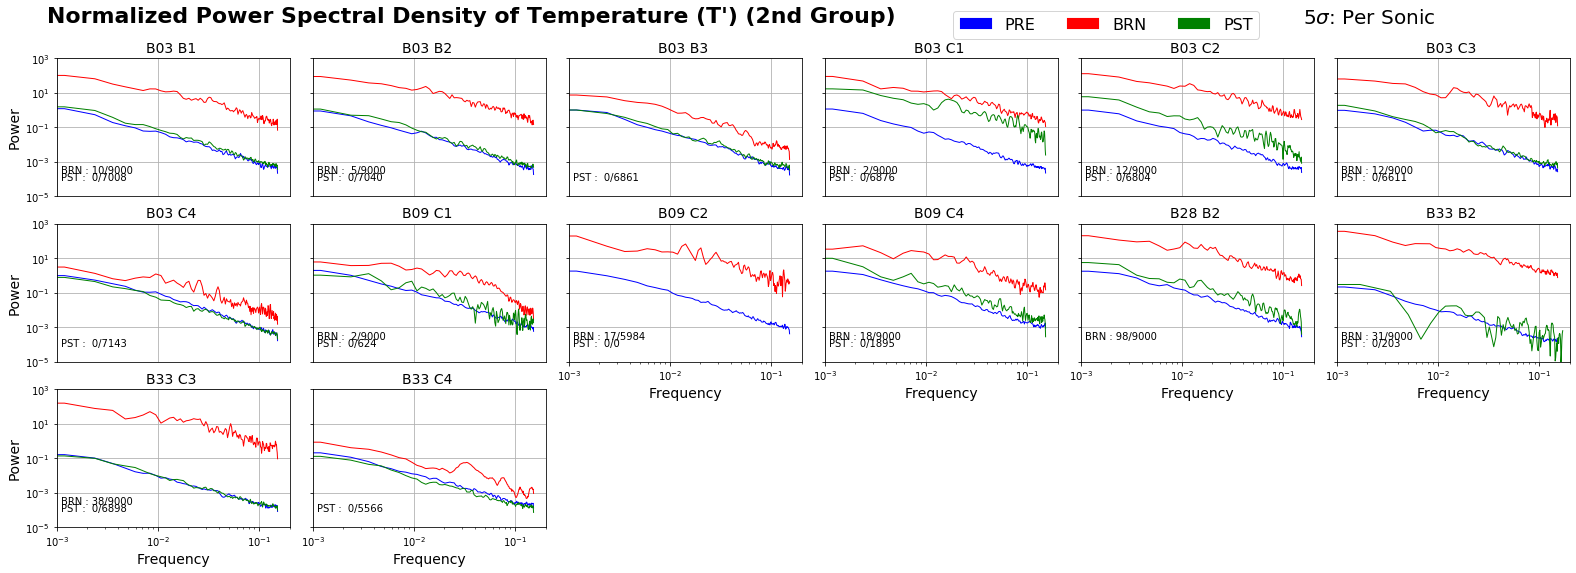

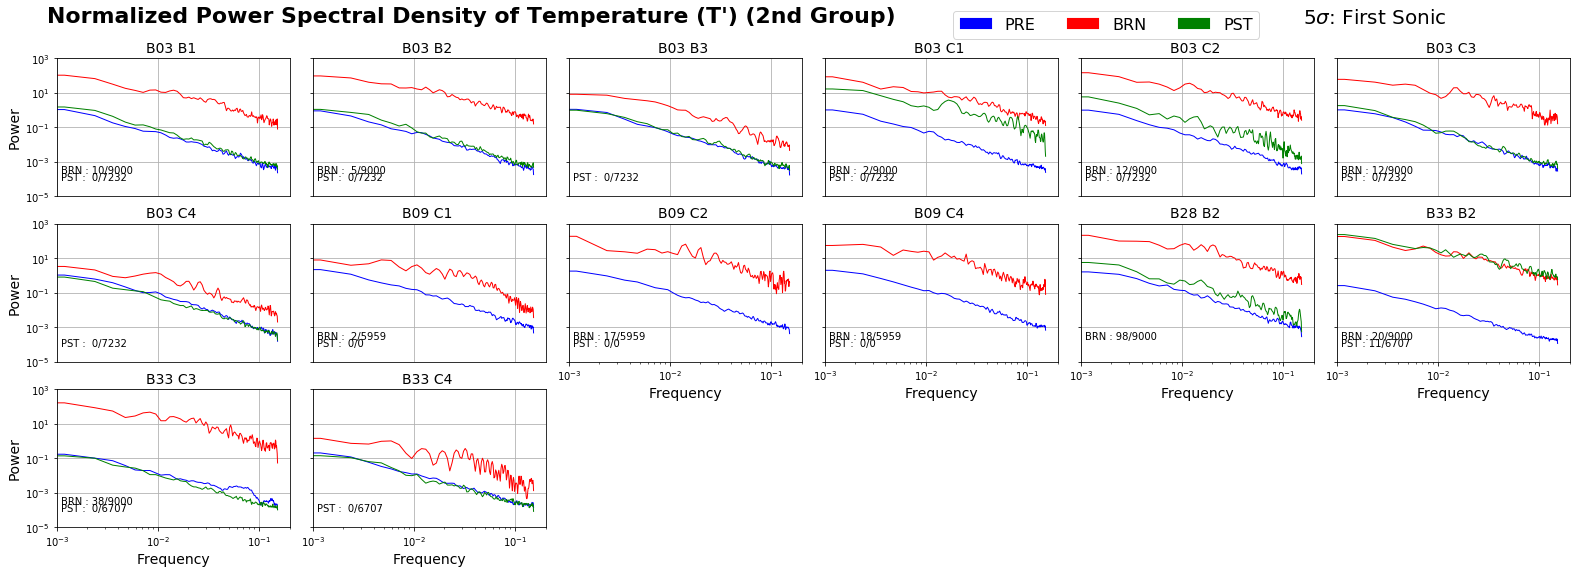

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 203, using nperseg = 203
  .format(nperseg, input_length))


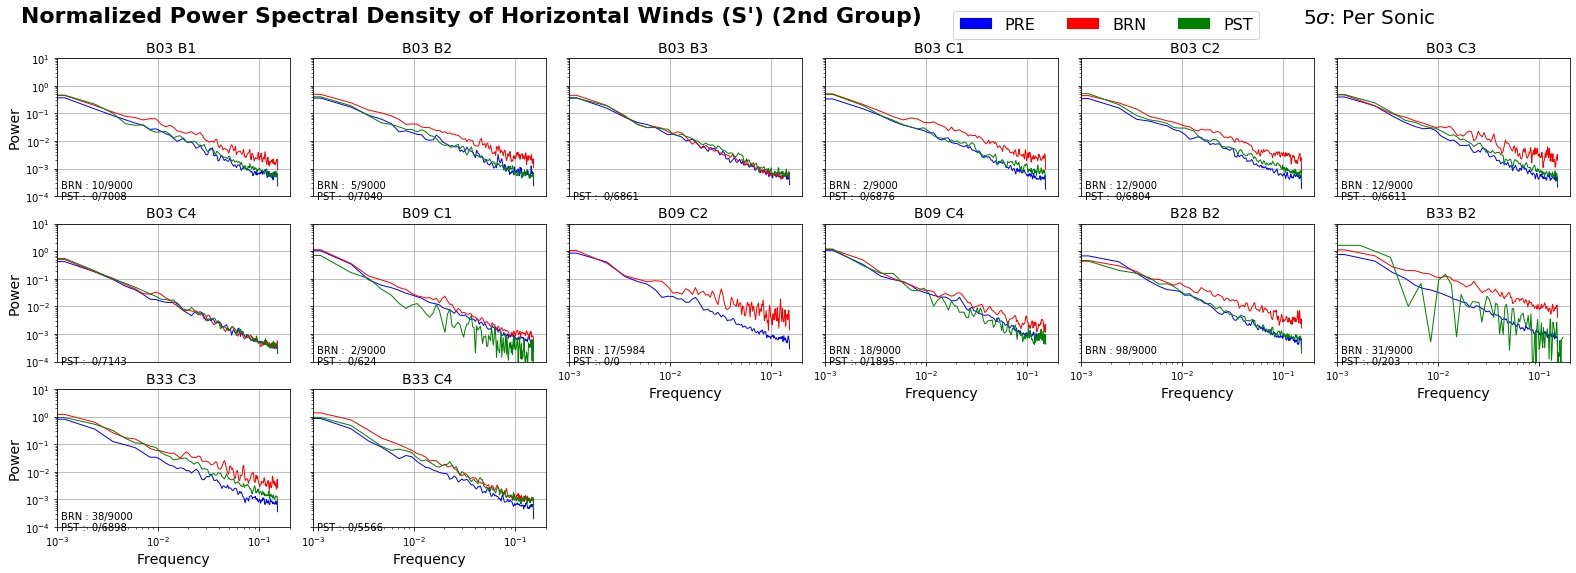

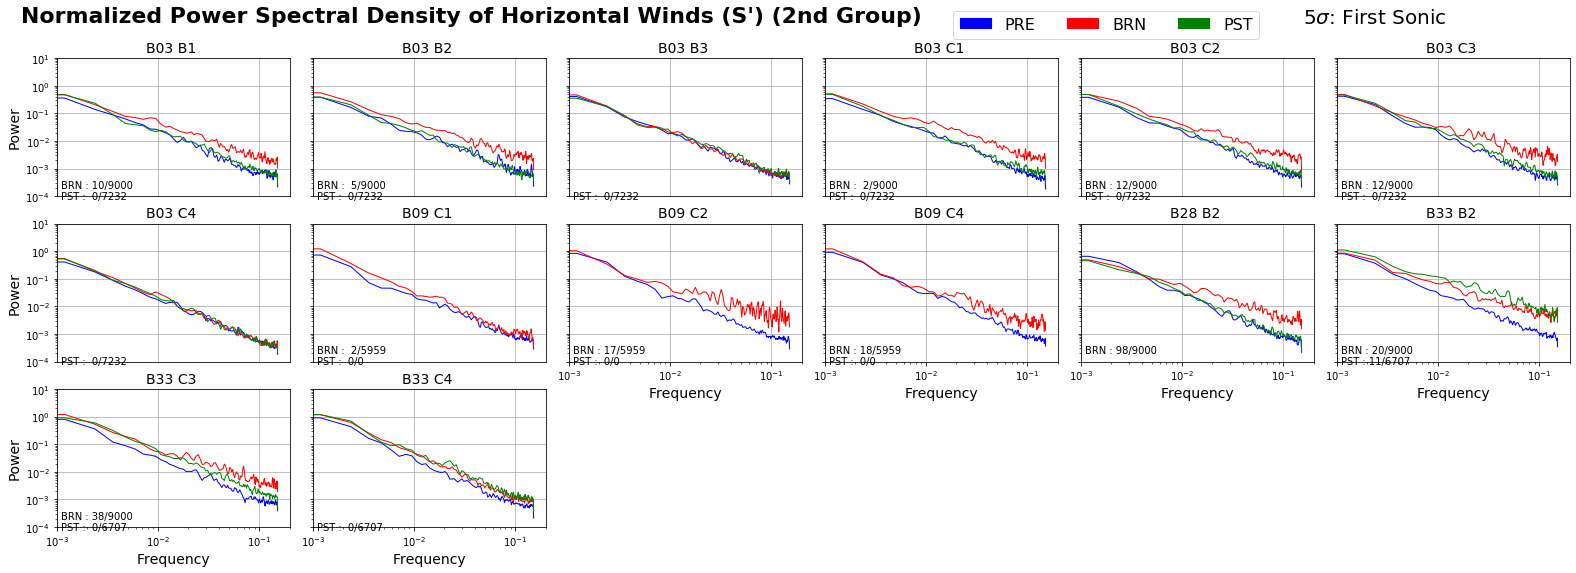

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 203, using nperseg = 203
  .format(nperseg, input_length))


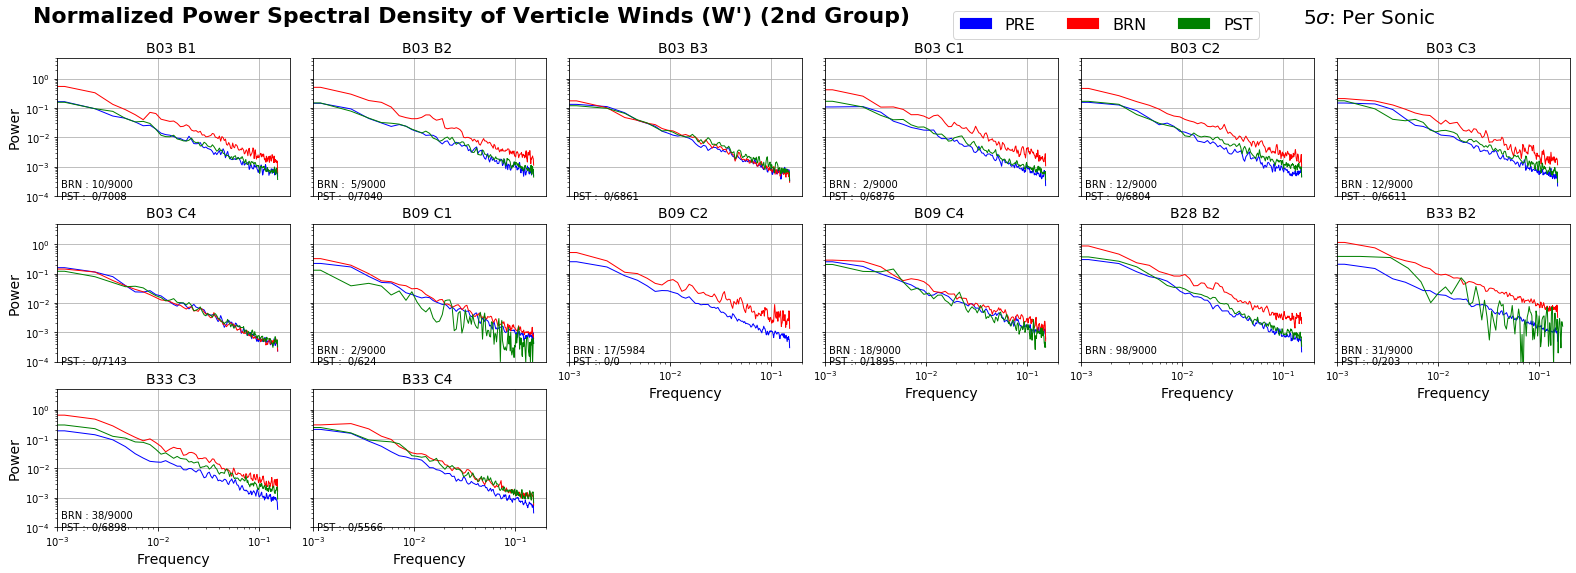

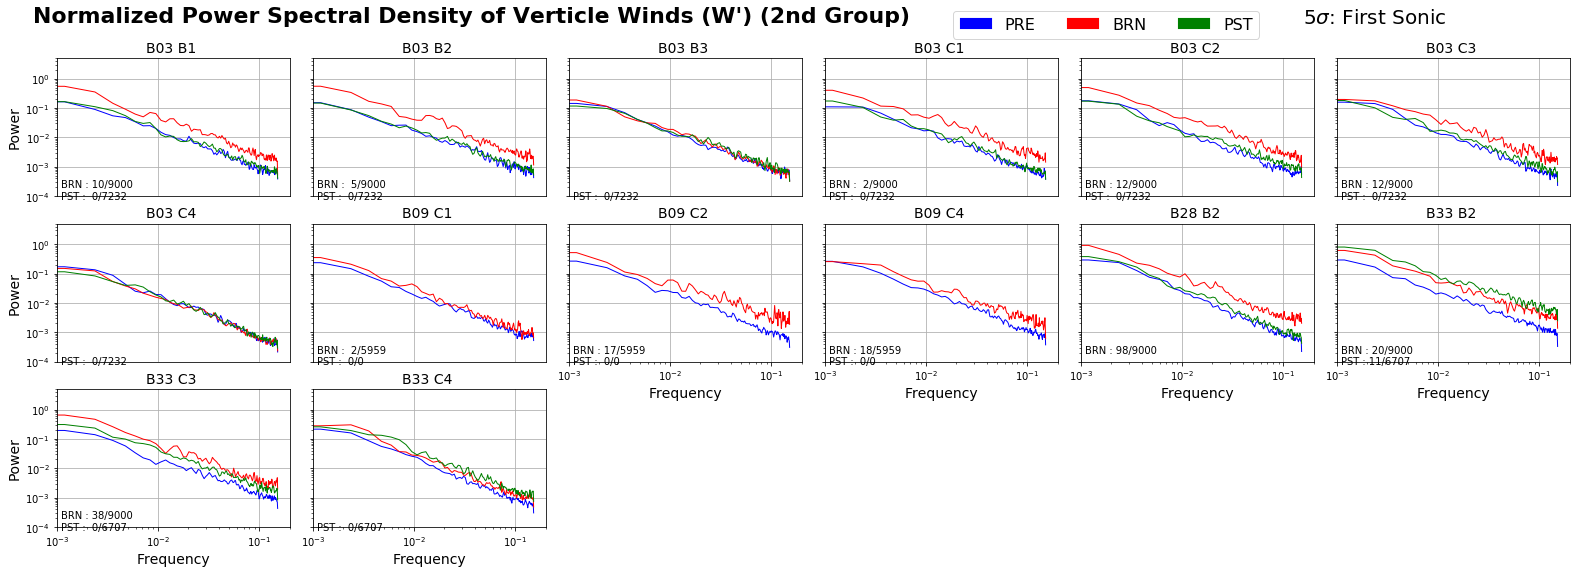

In [12]:
welch_power_spec_2("T",False)
welch_power_spec_2("T",True)

welch_power_spec_2("S",False)
welch_power_spec_2("S", True)

welch_power_spec_2("W",False)
welch_power_spec_2("W",True)

In [13]:
def welch_power_spec_3(variable, sigma_fire = True ):

    burn_d = {'01': [21000 ,22289], '02': [14000, 14972], '03': [20000, 20296], '04': [30000, 34979], '05': [15000, 15974], \
              '06': [6000, 6544], '07': [25000, 27822], '08': [18000, 19810], '09': [20000, 25047], '11': [30000,30681],  \
              '12': [60000, 62937], '13': [50000, 55131], '18': [185000, 192322], '19': [45000, 48831], '20': [24000, 25860],\
              '21': [25000, 27822], '22': [27000, 29484], '23': [45000, 48846], '24': [20000, 23015], '25': [25000, 26797], \
              '26': [25000, 26909], '27': [35000, 36916], '28': [27000, 28673], '29': [25000, 28166], '30': [12000, 13954], \
              '31': [30000, 31046], '32': [25000, 26294], '33': [20000, 23293], '34': [40000,43702]}
    
    #burn = "01"
    path = "/Users/joeyp/Desktop/10X10_Truss_SERDP_Burns/JS_Cleaned_Data/Full-Timestamp/Burn-" #w10
    path_end = "/sonics/"
    #B2_UVWT_Burn-01.txt

        #files = text_finder(p)


    blu_patch = mpatches.Patch(color = "b", label = "PRE", linewidth = .1)
    red_patch = mpatches.Patch(color = "r", label = "BRN", linewidth = .1)
    grn_patch = mpatches.Patch(color = "g", label = "PST", linewidth = .1)
    patches = [blu_patch, red_patch, grn_patch]

    fig, axs = plt.subplots(nrows=4,ncols=6,figsize=(22,10), sharey = True)#, sharex = True)

    col, row = 0, 0
    for i in third_sonic_d:
        burn = i
        for sc in third_sonic_d[i]:
            p = path+i+ path_end+sc+"_UVWT_Burn-"+i+".txt"
            df=file_to_df(p)
            temp_5sig = " "
            ax = axs[ row, col]
            if sigma_fire == True:
                if variable !="S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(list(df[variable]), burn_d[burn][1])
                if variable == "S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(speed_calculation(df), burn_d[burn][1])
            if sigma_fire == False:
                
                x_fire = fire_start(df, burn_d[burn][0])
                if x_fire == 9e10:
                    x_fire = burn_d[burn][1]
                    temp_5sig = "*"
                if variable !="S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(list(df[variable]), x_fire)
                if variable == "S":
                    pre_lst, brn_lst, pst_lst = fire_period_split(speed_calculation(df), x_fire)
            
            pre_x, pre_y, pre_nan = welch_spectra(pre_lst)
            brn_x, brn_y, brn_nan = welch_spectra(brn_lst)
            pst_x, pst_y, pst_nan = welch_spectra(pst_lst)

            ax.loglog(pre_x, pre_y, color = "b", linewidth=1)
            ax.loglog(brn_x, brn_y, color = "r", linewidth=1)
            ax.loglog(pst_x, pst_y, color = "g", linewidth=1)
            
            ax.set_xlim(10**(-3),2*10**-1)
            if variable == "T":
                ax.set_ylim(10**(-5),10**3)
            if variable == "W":
                ax.set_ylim(10**(-4),5*10**(0))
            if variable == "S":
                ax.set_ylim(10**(-4),10**(1))
                
            ax.set_title("B"+burn+" "+sc+temp_5sig, fontsize = 14)
            
            
            fmt = "{:4}:{:3}/{} "
            if pre_nan > 0 or len(pre_lst) < 9000:
                ax.text(1.1*10**-3,5*10**-4, fmt.format("PRE", pre_nan, len(pre_lst)))
           
            if brn_nan > 0 or len(brn_lst) < 9000:
                ax.text(1.1*10**-3,2*10**-4, fmt.format("BRN", brn_nan, len(brn_lst)))
            
            if pst_nan > 0 or len(pst_lst) < 9000:
                ax.text(1.1*10**-3,.8*10**-4, fmt.format("PST", pst_nan, len(pst_lst)))
          
                
            
            #ax.legend(markerscale = 5, loc = "upper right")
            if row <= 1:
                 ax.tick_params(axis = "x", which = "both", bottom =False, top= False,labelbottom = False)
            if row == 2 and col <2:
                 ax.tick_params(axis = "x", which = "both", bottom =False, top= False,labelbottom = False)

            #set_tick_params( bottom='on',labelbottom='on')# labelleft='off', \
                            #labeltop='off', labelright='off', labelbottom='off')
            ax.grid()
            if col == 0:
                ax.set_ylabel("Power", fontsize = 14)
            if row == 3:
                ax.set_xlabel("Frequency", fontsize = 14)
            if row == 2 and col >=2:
                ax.set_xlabel("Frequency", fontsize = 14)
            
            if col <= 6:
                col += 1
            if col  == 6:
                col = 0
                row +=1
            #print(row, col)
    for i in range(4):
        ax = axs[3, 2+i]
        ax.set_visible(False)
    fig.tight_layout()
    leg = fig.legend(handles = patches, ncol = 3, bbox_to_anchor = (.8, .99), fontsize = 16)
    fig.subplots_adjust(hspace=0.2, wspace=0.1, top=.9)#, left = 0.05, right = .95, bottom = .07)
    if variable == "S":
        title = "Horizontal Winds ("+variable+"')"
    if variable == "T":
        title = "Temperature ("+variable+"')"
    if variable == "W":
        title = "Verticle Winds ("+variable+"')"
         
    fig.suptitle("Normalized Power Spectral Density of " + title+" (3rd Group)", fontsize = 22, x= .3, y= .99, fontweight = "heavy")                 
    if sigma_fire == True:
        fig.text(.825,.96, r"5$\sigma$: First Sonic", fontsize =20)
        fig.savefig("Third-Group-PDS-"+variable+"_first_sonic.png",dpi=350)
    if sigma_fire == False:
        fig.text(.825,.96, r"5$\sigma$: Per Sonic", fontsize =20)
        fig.savefig("Third-Group-PDS-"+variable+"_per_sonic.png",dpi=350)
    plt.show()
    
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 29, using nperseg = 29
  .format(nperseg, input_length))


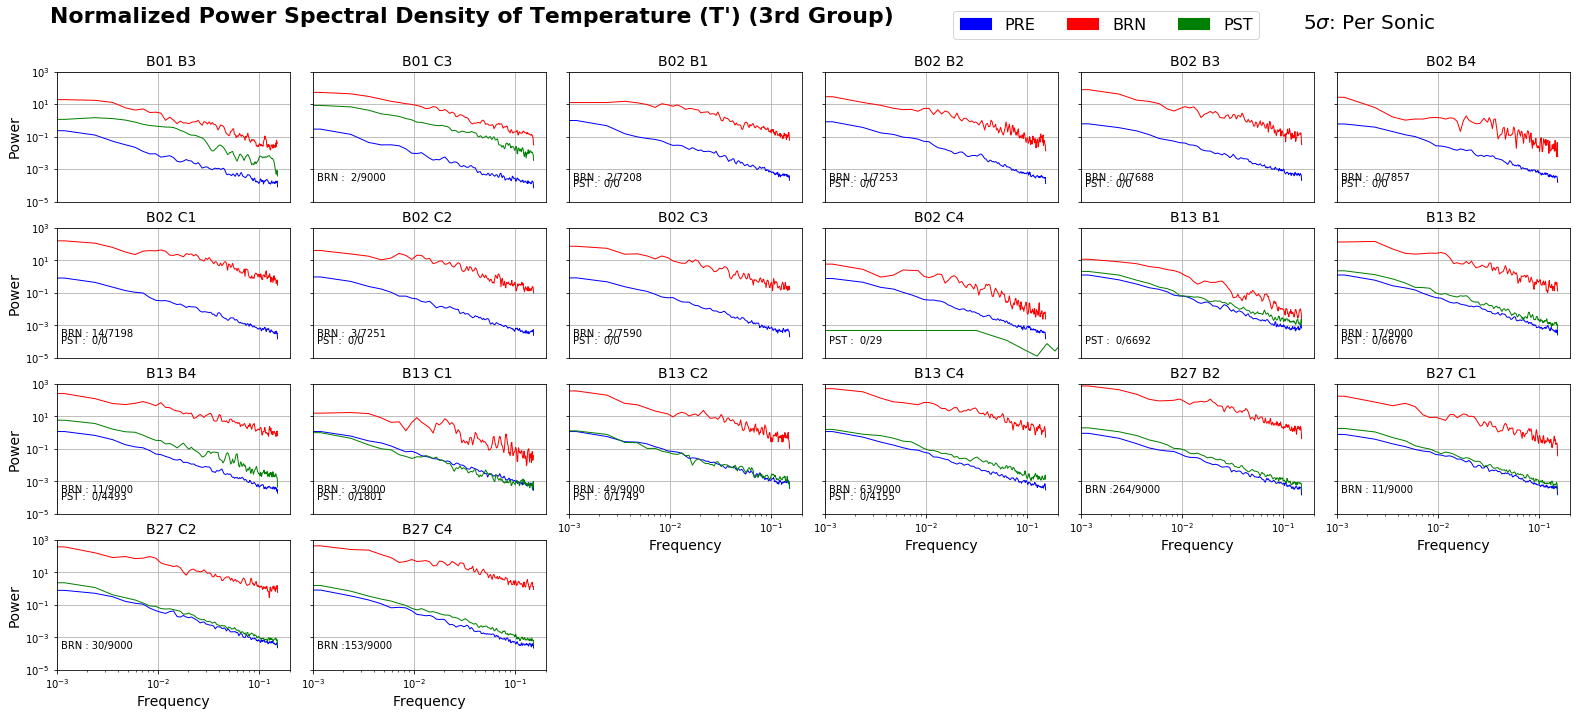

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\s

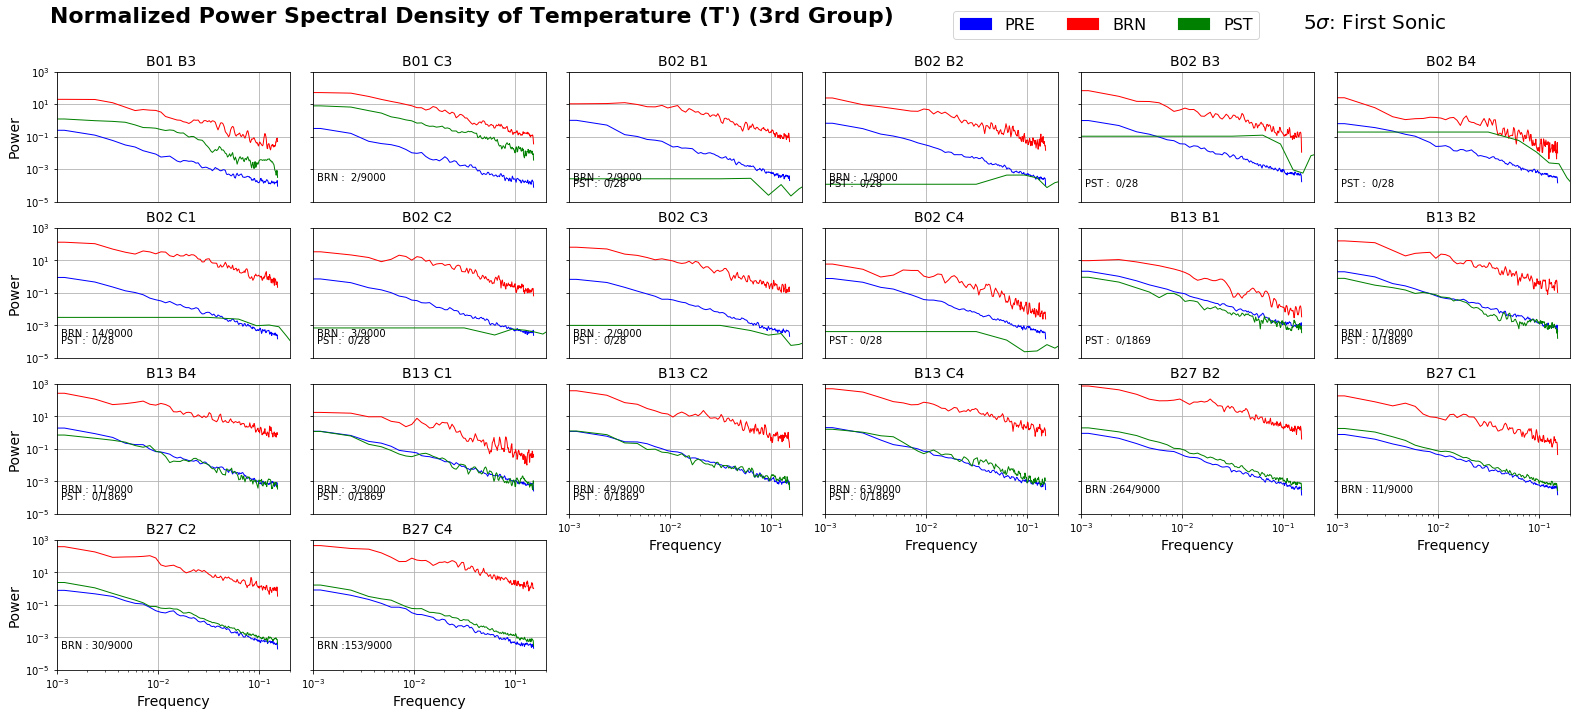

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 29, using nperseg = 29
  .format(nperseg, input_length))


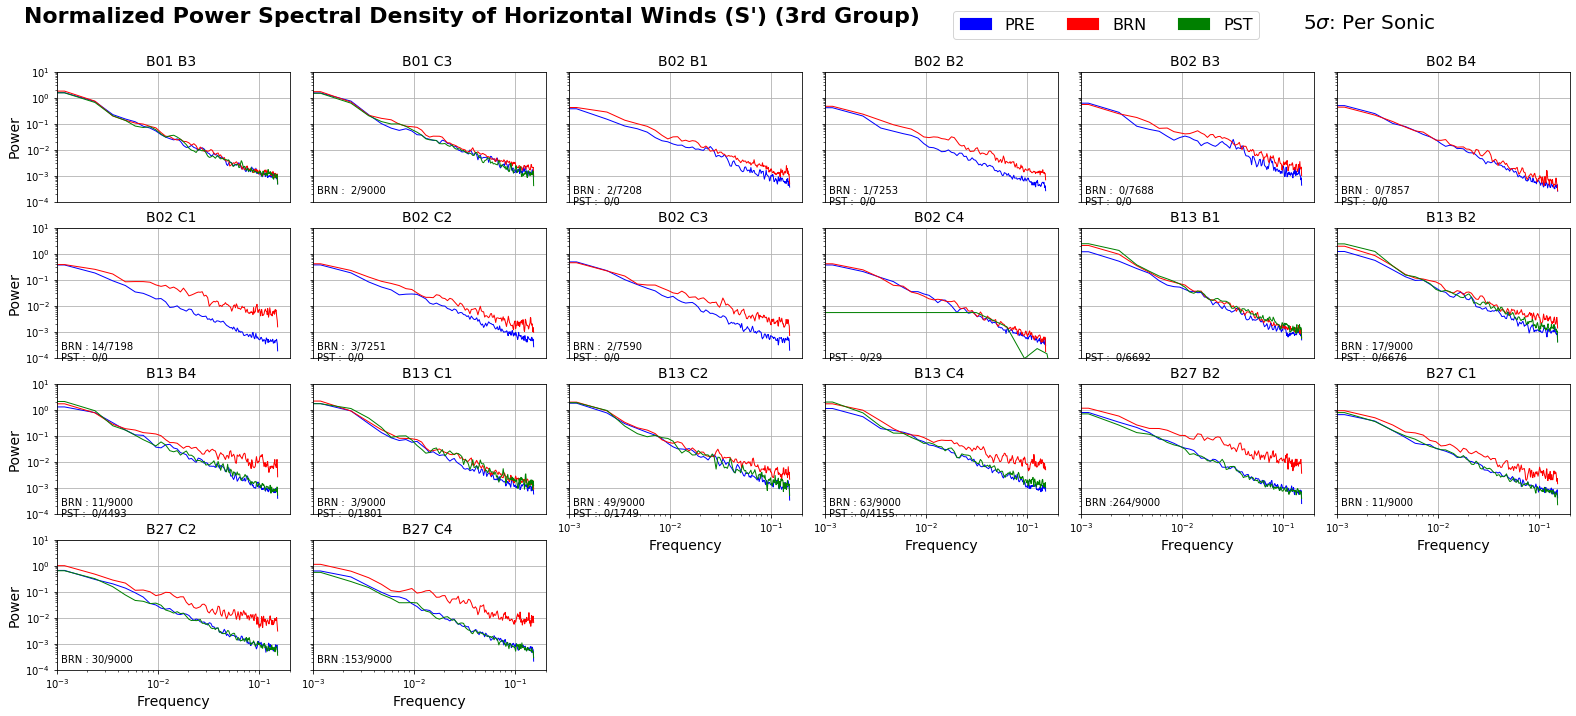

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\s

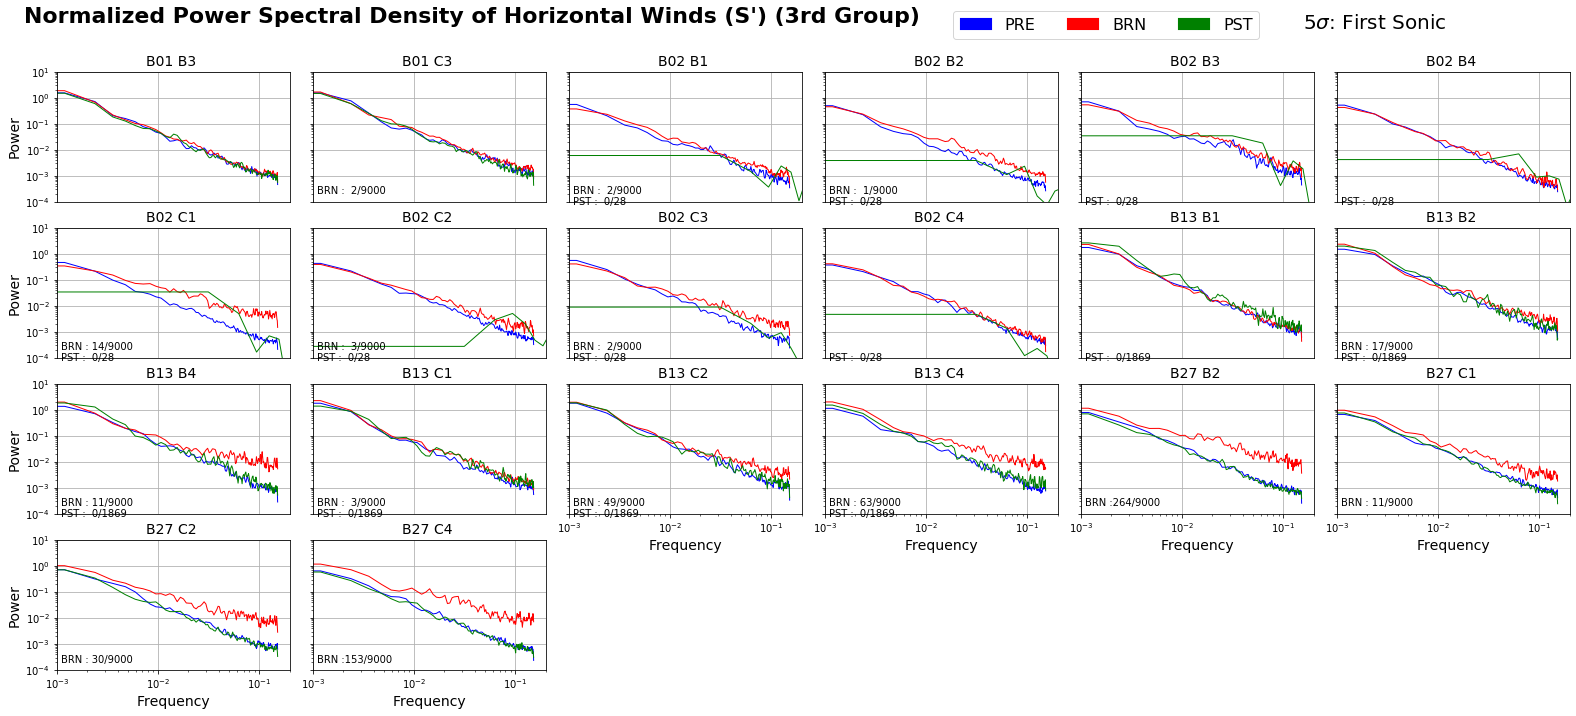

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 29, using nperseg = 29
  .format(nperseg, input_length))


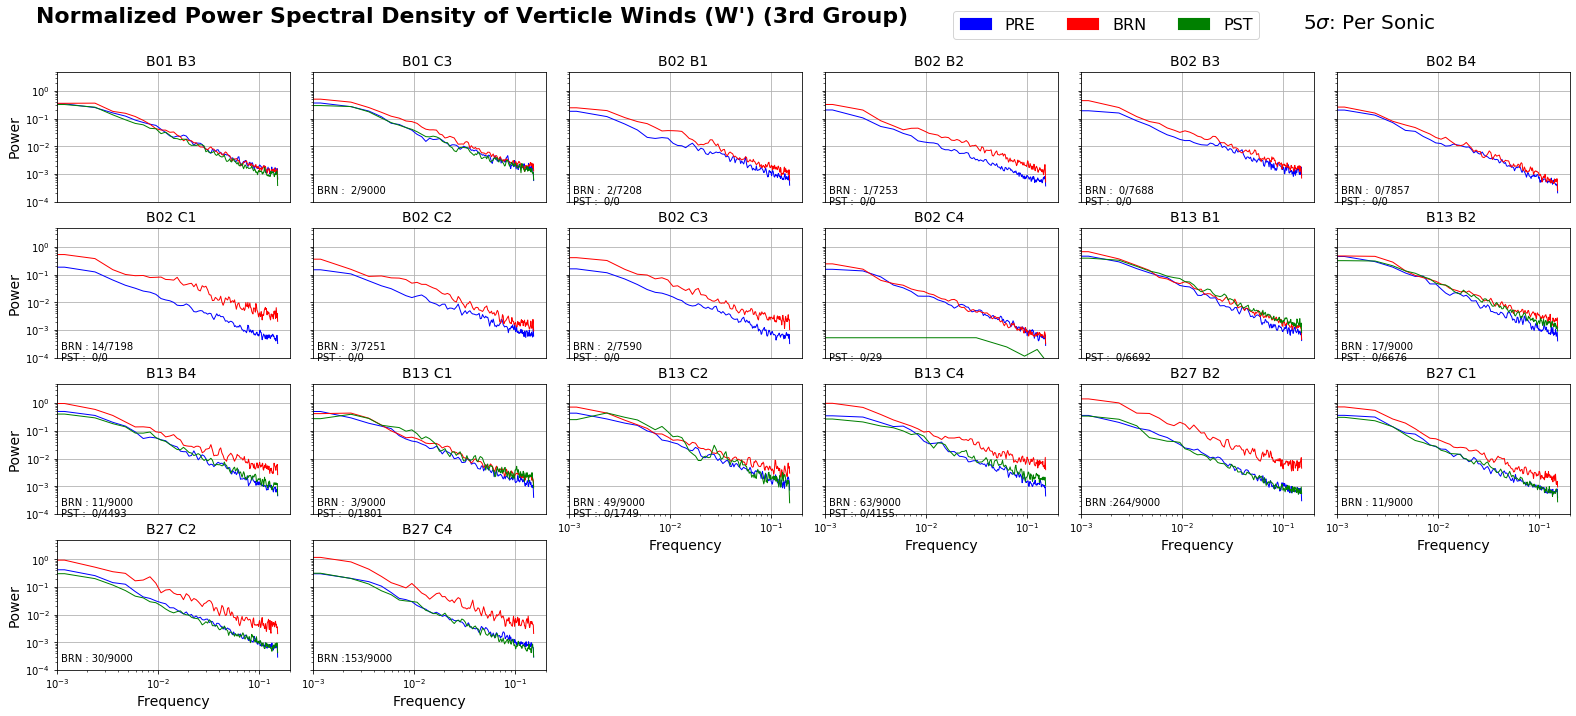

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\s

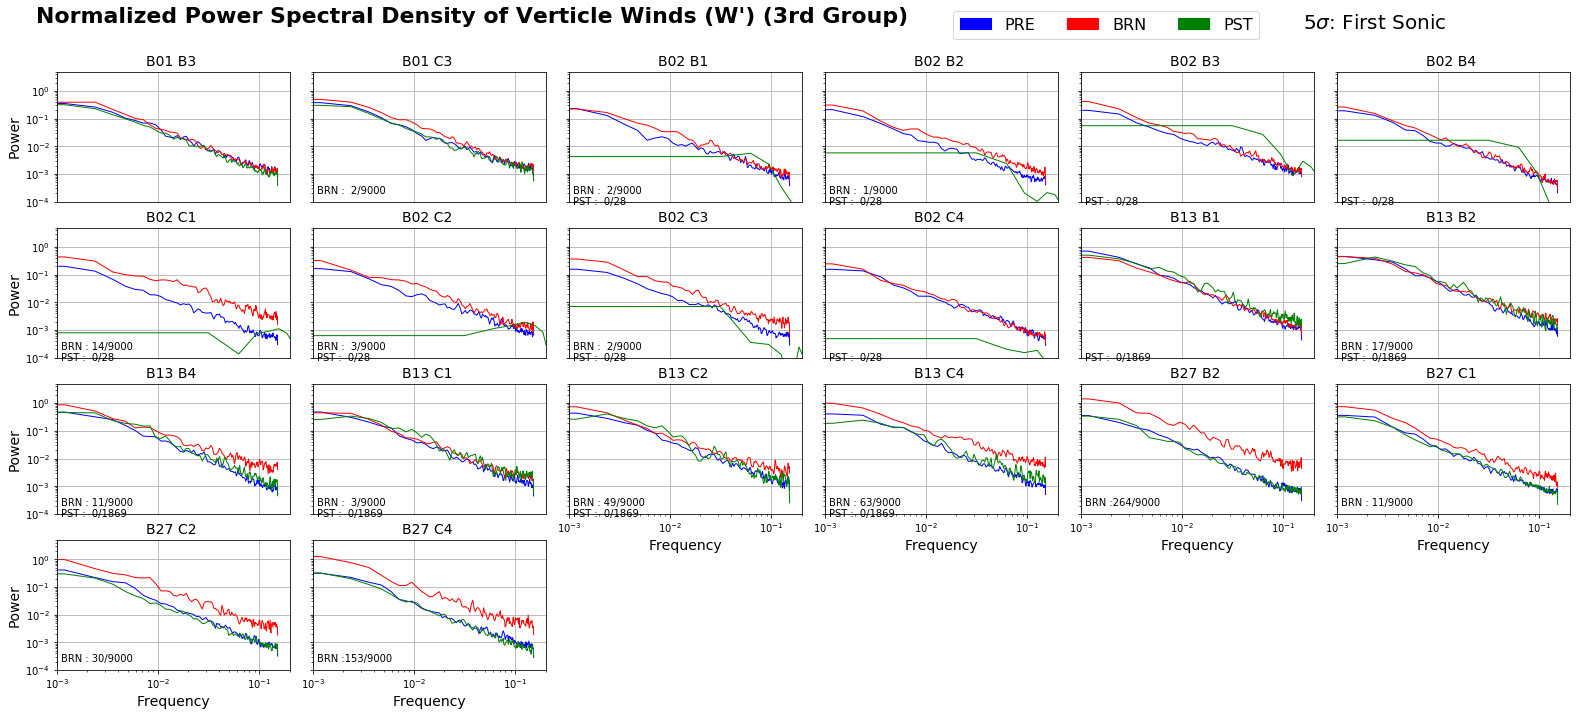

In [14]:
welch_power_spec_3("T",False)
welch_power_spec_3("T",True)

welch_power_spec_3("S",False)
welch_power_spec_3("S", True)

welch_power_spec_3("W",False)
welch_power_spec_3("W",True)